# **Project 2 - Part 4**
*   Samar KRIMI
*   18/09/2023

---

We will use the pre-approved dataset called **Stroke Prediction Dataset**. Stroke can be very hard to predict and therefore try to hinder, because it is the result of many different pathophysiologies.

1. Source of data :
Here is the link for where the data is found from kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

2. Brief description of data :
This is a healthcare dataset used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

3. What is the target :
There are 2 possible classes : predict stroke (target): 1 if the patient had a stroke or 0 if not.

4. What does one row represent :
Each row represents a specific patient.

5. Is this a classification or regression problem :
This is a binary classification problem.

6. How many features does the data have :
The data contains 12 attributes (columns).

7. How many rows are in the dataset :
The data contains 5110 observations (rows).

8. What challenges do you foresee in cleaning, exploring, or modeling this dataset :
- In cleaning :
Clean inaccurate or incorrect values, missing or incomplete data, outlier or anomalous data, and duplicate or redundant data.
I have to deal with inconsistent or conflicting features that creates confusion, incorrect features that could lead to bad decision-making and also affect the patient's life.
- In Exploring :
Identify relationships between different data variables and the distribution of data values in order to reveal patterns and points of interest, enabling to gain greater insight into the raw data.
- In Modeling :
Choose the right data model especially when data is unbalanced, regularize the model by tunning hyperparameters and dealing with class imbalance and compare the model's performance.

**Attribute Information**

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

12) stroke: 1 if the patient had a stroke or 0 if not



In [ ]:
# Mount the Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
## Standards Librairies Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & Preprocessing Import
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline

# Feature Engineering Import
from sklearn.decomposition import PCA

# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load & read data from folder structure
fpath = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(fpath)
# Explore data : missing values, columns, types
df.info()
# Top rows of the dataframe
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **Class Balance** : highly unbalanced

In [ ]:
# Check target balance
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
# Check target balance in percent : a highly unbalanced dataset
df['stroke'].value_counts(normalize = True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [ ]:
# Set the parameters that control the general style of the plots
sns.set_style("whitegrid")
# change the global styling for all plots
plt.style.use("fivethirtyeight")

<Axes: >

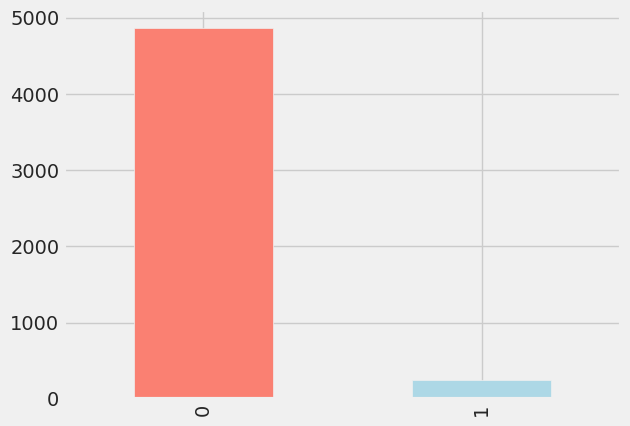

In [ ]:
# Barplot for the unbalanced dataset
df.stroke.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

We have 249 patients that have a stroke and 4861 patients without having a stroke, so our problem is is super unbalanced.

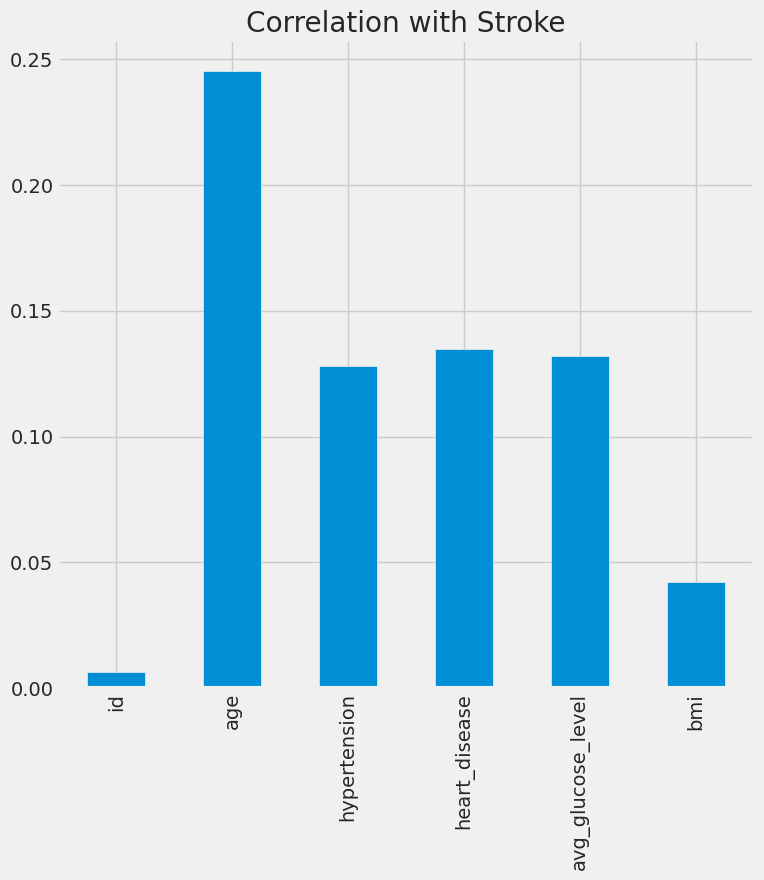

In [ ]:
# 'stroke' is a target in this case "categorical" (integer) : boolean
df.drop('stroke', axis=1).corrwith(df['stroke']).plot(kind='bar', grid=True, figsize=(8, 8),title="Correlation with Stroke");

* Observations from correlation :

bmi feature is the least correlated with the target (stroke), it has a very low correlation. For numeric features age and avg_glucose_level they have a low positive correlation. Boolean features hypertension & heart_disease have also low positive correlation with the target.

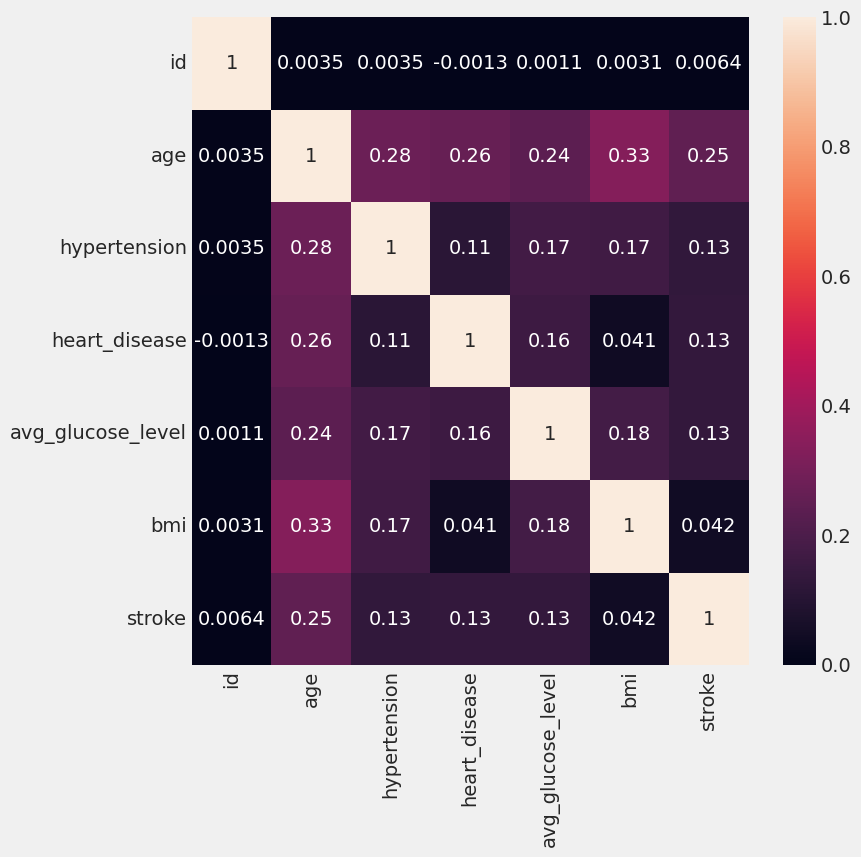

In [ ]:
# Check the correlation between all features and target : low correlation & very low correlation
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, ax=ax);

# **EDA : Cleaning Data**

## Deleted unnecessary columns

In [ ]:
# Drop unnecessery columns ('id' is not predictive)
df=df.drop(columns=['id'])

In [ ]:
# Check dataframe after deleting unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Deleted duplicate rows

In [ ]:
# Check for exact duplicates (rows) : No duplicated
df.duplicated().sum()

0

## Identified and addressed missing values

In [ ]:
# Check missing values
df.isna().sum().sum()

201

In [ ]:
# Check missing values in each feature
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Exploratory Visualization to determine the best imputation method for the numerical column 'bmi'
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = {mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = {med_value:,.2f}");

  axes[0].legend();

  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

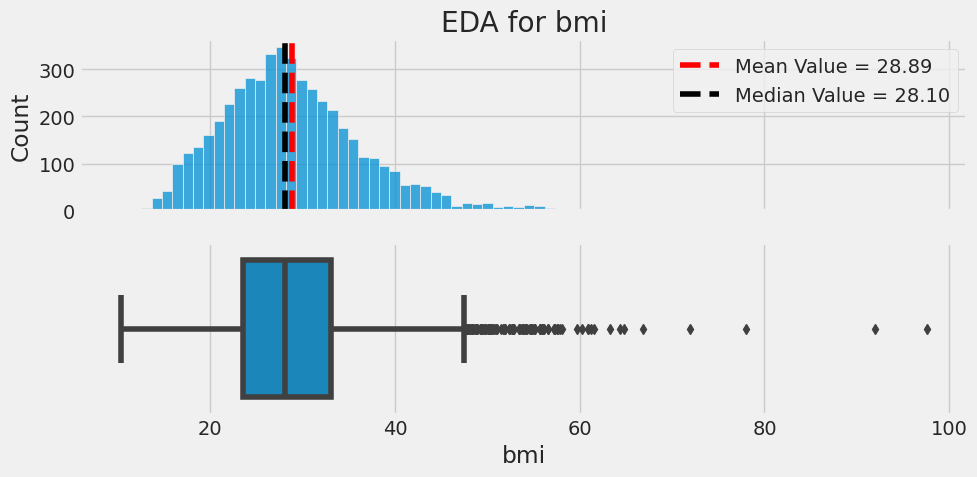

In [ ]:
plot_numeric(df,'bmi')

* Missing values in 'bmi' feature = 3.93% < 5% we can drop them but I choose to impute the values by simple imputation technique: The distribution is symetric bimodal, therefore the missing value will be imputed with the mean.

In [ ]:
# Impute missig values in 'bmi'feature by median
df['bmi'].fillna(df['bmi'].mean(), inplace = True)

In [ ]:
# No remaining missing values
df.isna().sum().sum()

0

## Identified and corrected inconsistencies in data for categorical values

In [ ]:
# To view if there's a space in the columns name
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# Check for total values for each type
df.dtypes.value_counts()

object     5
float64    3
int64      3
dtype: int64

In [ ]:
# The 'hypertension', 'heart_disease', 'stroke' columns are nominal categorical variables 1 : Yes, 0 : No
# Convert the datatype from integer to object
df['hypertension'] = df['hypertension'].astype(object)
df['heart_disease'] = df['heart_disease'].astype(object)

In [ ]:
# Check types after conversion
df.dtypes.value_counts()

object     7
float64    3
int64      1
dtype: int64

In [ ]:
# Identify string columns after conversion
string_cols = df.select_dtypes("object").columns
string_cols

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

We have 8 Nominal Features: gender, ever_married, work_type, Residence_type, smoking_status, hypertension, heart_disease and stroke (target).

In [ ]:
# Checking nuniuqe categories : No feature with high cardinality to drop
df.select_dtypes('object').nunique()

gender            3
hypertension      2
heart_disease     2
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [ ]:
# Check the categorical values of 'gender' feature => nominal feature
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
# Inconsistent category from gender column is fixed : replace Other by Male (the lower category)
df['gender'] = df['gender'].replace(['Other'],['Male'])
df['gender'].value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

In [ ]:
# Check the categorical values of 'ever_married' feature => nominal feature
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
# Check the categorical values of 'work_type' feature => nominal feature
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
# Inconsistent category from 'work_type' column is fixed : replace children (first lower letter) by Children (first Upper letter)
df['work_type'] = df['work_type'].replace(['children'],['Children'])
df['work_type'].value_counts()

Private          2925
Self-employed     819
Children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
# Filter the 22 patients whom never worked ranked by age
df.loc[df['work_type']=='Never_worked'].sort_values(by='age')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4410,Male,13.0,0,0,No,Never_worked,Urban,85.08,14.6,Unknown,0
939,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
1789,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
3196,Male,14.0,0,0,No,Never_worked,Urban,137.91,41.8,never smoked,0
2346,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
3972,Male,15.0,0,0,No,Never_worked,Urban,64.29,16.7,Unknown,0
2740,Male,15.0,0,0,No,Never_worked,Rural,79.59,28.4,Unknown,0
2781,Female,16.0,0,0,No,Never_worked,Urban,84.40,25.9,never smoked,0
4068,Female,16.0,0,0,No,Never_worked,Urban,102.10,27.1,never smoked,0


I leave the 22 few number Never_worked, I can't replace it with children because the children's age not exceed 16 years and Never_worked have some ages between 17 & 23 years.

In [ ]:
# Check the categorical values of 'Residence_type' feature => nominal feature
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
# Check the categorical values of 'smoking_status' feature => nominal feature
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
# Inconsistent category from smoking_status column is fixed : replace Unknown by occasional smoker
df['smoking_status'] = df['smoking_status'].replace(['Unknown'],['occasional smoker'])
df['smoking_status'].value_counts()

never smoked         1892
occasional smoker    1544
formerly smoked       885
smokes                789
Name: smoking_status, dtype: int64

In [ ]:
# Obtain the value counts for all string columns adressed
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for gender
Female    2994
Male      2116
Name: gender, dtype: int64


Value Counts for hypertension
0    4612
1     498
Name: hypertension, dtype: int64


Value Counts for heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64


Value Counts for ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


Value Counts for work_type
Private          2925
Self-employed     819
Children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Value Counts for Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Value Counts for smoking_status
never smoked         1892
occasional smoker    1544
formerly smoked       885
smokes                789
Name: smoking_status, dtype: int64




## Identified and corrected inconsistencies in data for numeric values

In [ ]:
# Convert the datatype from float to integer
df['age'] = df['age'].astype(int)

In [ ]:
# Check the cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 439.3+ KB


In [ ]:
# Check types after conversion : dtypes are consistent and make sense
df.dtypes.value_counts()

object     7
int64      2
float64    2
dtype: int64

In [ ]:
# Checking nuniuqe categories
df.select_dtypes('number').nunique()

age                    83
avg_glucose_level    3979
bmi                   419
stroke                  2
dtype: int64

In [ ]:
# Checking for inconsistent numeric variables
# Limit output to min, max, 25% and 75%
df.describe().round(2).loc[['mean','min','25%','75%','max']]

,age,avg_glucose_level,bmi,stroke
mean,43.22,106.15,28.89,0.05
min,0.00,55.12,10.30,0.00
25%,25.00,77.24,23.80,0.00
75%,61.00,114.09,32.80,0.00
max,82.00,271.74,97.60,1.00


In [ ]:
# Impossible value for min age (must be > 0 year): we should fix it by its mean value
df[['age']].mean()

age    43.215264
dtype: float64

In [ ]:
# Replace min=0 by its mean value in 'age' feature
df['age']=df['age'].replace(0, df['age'].mean())

In [ ]:
# Check statistics after fixing 'age' feature
df.describe().round(2).loc[['mean','min','25%','75%','max']]

,age,avg_glucose_level,bmi,stroke
mean,43.58,106.15,28.89,0.05
min,1.00,55.12,10.30,0.00
25%,26.00,77.24,23.80,0.00
75%,61.00,114.09,32.80,0.00
max,82.00,271.74,97.60,1.00


In [ ]:
# Check for unique values in columns
df.nunique()

gender                  2
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
# Check the values of the dataframe
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

gender : ['Male' 'Female']
age : [67.         61.         80.         49.         79.         81.
 74.         69.         59.         78.         54.         50.
 64.         75.         60.         57.         71.         52.
 82.         65.         58.         42.         48.         72.
 63.         76.         39.         77.         73.         56.
 45.         70.         66.         51.         43.         68.
 47.         53.         38.         55.          1.         46.
 32.         14.          3.          8.         37.         40.
 35.         20.         44.         25.         27.         23.
 17.         13.          4.         16.         22.         30.
 29.         11.         21.         18.         33.         24.
 34.         36.         43.21526419 41.          5.         26.
 31.          7.         12.         62.          2.          9.
 15.         28.         10.         19.          6.        ]
hypertension : [0 1]
heart_disease : [1 0]
ever_married : ['

In [ ]:
# Replace float values by their mean rounded values in age & bmi features
df['age']=df['age'].round()
df['bmi']=df['bmi'].round(1)

In [ ]:
# Check the values of the dataframe fixed
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

gender : ['Male' 'Female']
age : [67. 61. 80. 49. 79. 81. 74. 69. 59. 78. 54. 50. 64. 75. 60. 57. 71. 52.
 82. 65. 58. 42. 48. 72. 63. 76. 39. 77. 73. 56. 45. 70. 66. 51. 43. 68.
 47. 53. 38. 55.  1. 46. 32. 14.  3.  8. 37. 40. 35. 20. 44. 25. 27. 23.
 17. 13.  4. 16. 22. 30. 29. 11. 21. 18. 33. 24. 34. 36. 41.  5. 26. 31.
  7. 12. 62.  2.  9. 15. 28. 10. 19.  6.]
hypertension : [0 1]
heart_disease : [1 0]
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'Children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
avg_glucose_level : [228.69 202.21 105.92 ...  82.99 166.29  85.28]
bmi : [36.6 28.9 32.5 34.4 24.  29.  27.4 22.8 24.2 29.7 36.8 27.3 28.2 30.9
 37.5 25.8 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 25.4 22.2 30.5 26.5
 33.7 23.1 32.  29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5
 33.2 32.8 40.4 25.3 30.2 47.5 20.3 30.  28.1 31.1 21.7 27.  24.1 45.9
 44.1 22.9 29.1 32.3 41.1 25.6 29.8 26.3 26.2 29.4 24.4 28.  28.8 34.6
 19.4 30.3 41.5 22.6 

In [ ]:
# Check final dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 439.3+ KB


# **FEATURES INSPECTION**

## **NUMERIC FEATURES**

### Multivariate Visualization for Numeric Features

In [ ]:
# Set the parameters that control the general style of the plots
sns.set_style("whitegrid")
# change the global styling for all plots
plt.style.use("fivethirtyeight")

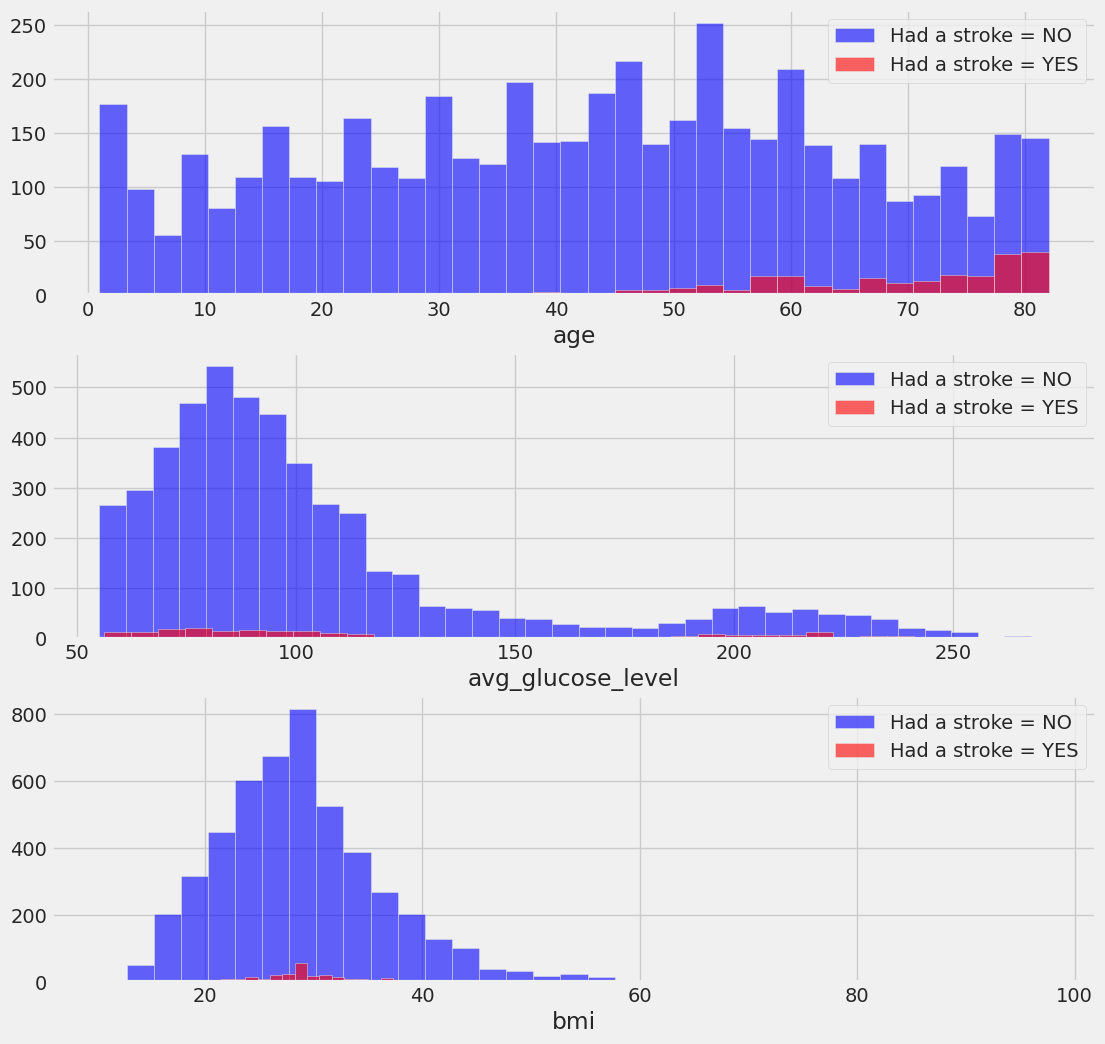

In [ ]:
# Plot histograms for all numeric features
plt.figure(figsize=(12, 12))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 1, i)
    df[df["stroke"] == 0][column].hist(bins=35, color='blue', label='Had a stroke = NO', alpha=0.6)
    df[df["stroke"] == 1][column].hist(bins=35, color='red', label='Had a stroke = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

* For bmi Feature vs. Target Observations:

I would expect this feature to be a classificator of the target: I think it's important to know about its body mass index to avoid certain diseases due to obesity.

This feature doesn't appear to be a classificator of the target because it has a very low correlation with it, diagnosis based on body mass index is not very relevant to determine if the patient will have a stroke.

* For age Feature vs. Target Observations:

I would expect this feature to be a classificator of the target: I think stroke increases with age, patients who are more than 45 are most likely to develop a stroke.

This feature doesn't appear to be a classificator of the target because it has a low correlation with it.


* For avg_glucose_level:

I would expect this feature to be a classificator of the target: I think it's important to know about its average glucose level in blood to avoid diabetes which is a serious chronic disease, the most important Average glucose level in blood is between 60 and 100.

This feature doesn't appear to be a classificator of the target because it has a very low correlation with it.

### Univariate Visualizations for Numeric Features

In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features"""

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100

  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

### **bmi feature**

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "bmi"
df[feature].dtype

dtype('float64')

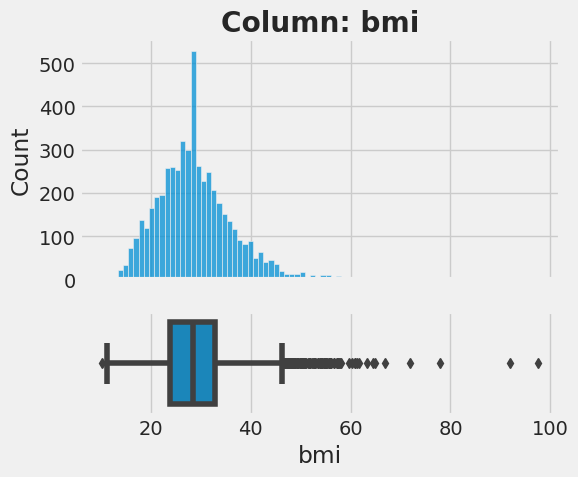

- NaN's Found: 0 (0.0%)
- Unique Values: 418
- Most common value: '28.9' occurs 232 times (4.54%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

### Feature Observations

It's a numeric feature

missing values : 201 (3.93%)
impute with mean

not constant or quasi-constant feature

cardinality : Not applicable (numeric)

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### **Age feature**

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "age"
df[feature].dtype

dtype('float64')

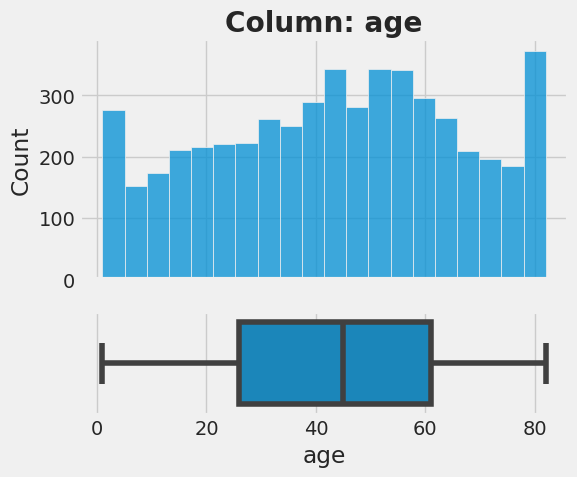

- NaN's Found: 0 (0.0%)
- Unique Values: 82
- Most common value: '43.0' occurs 113 times (2.21%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

### Feature Observations

It's a numeric feature

No missing values

not constant or quasi-constant feature

cardinality : Not applicable (numeric)

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### **avg_glucose_level feature**

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "avg_glucose_level"
df[feature].dtype

dtype('float64')

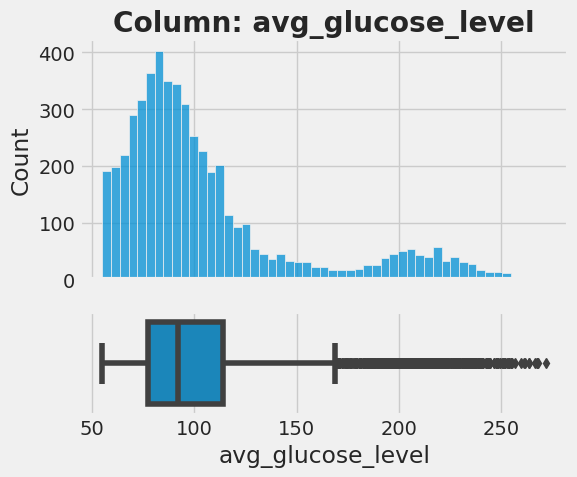

- NaN's Found: 0 (0.0%)
- Unique Values: 3979
- Most common value: '93.88' occurs 6 times (0.12%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

### Feature Observations

It's a numeric feature

No missing values

not constant or quasi-constant feature

cardinality : Not applicable (numeric)

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

## **CATEGORICAL FEATURES**

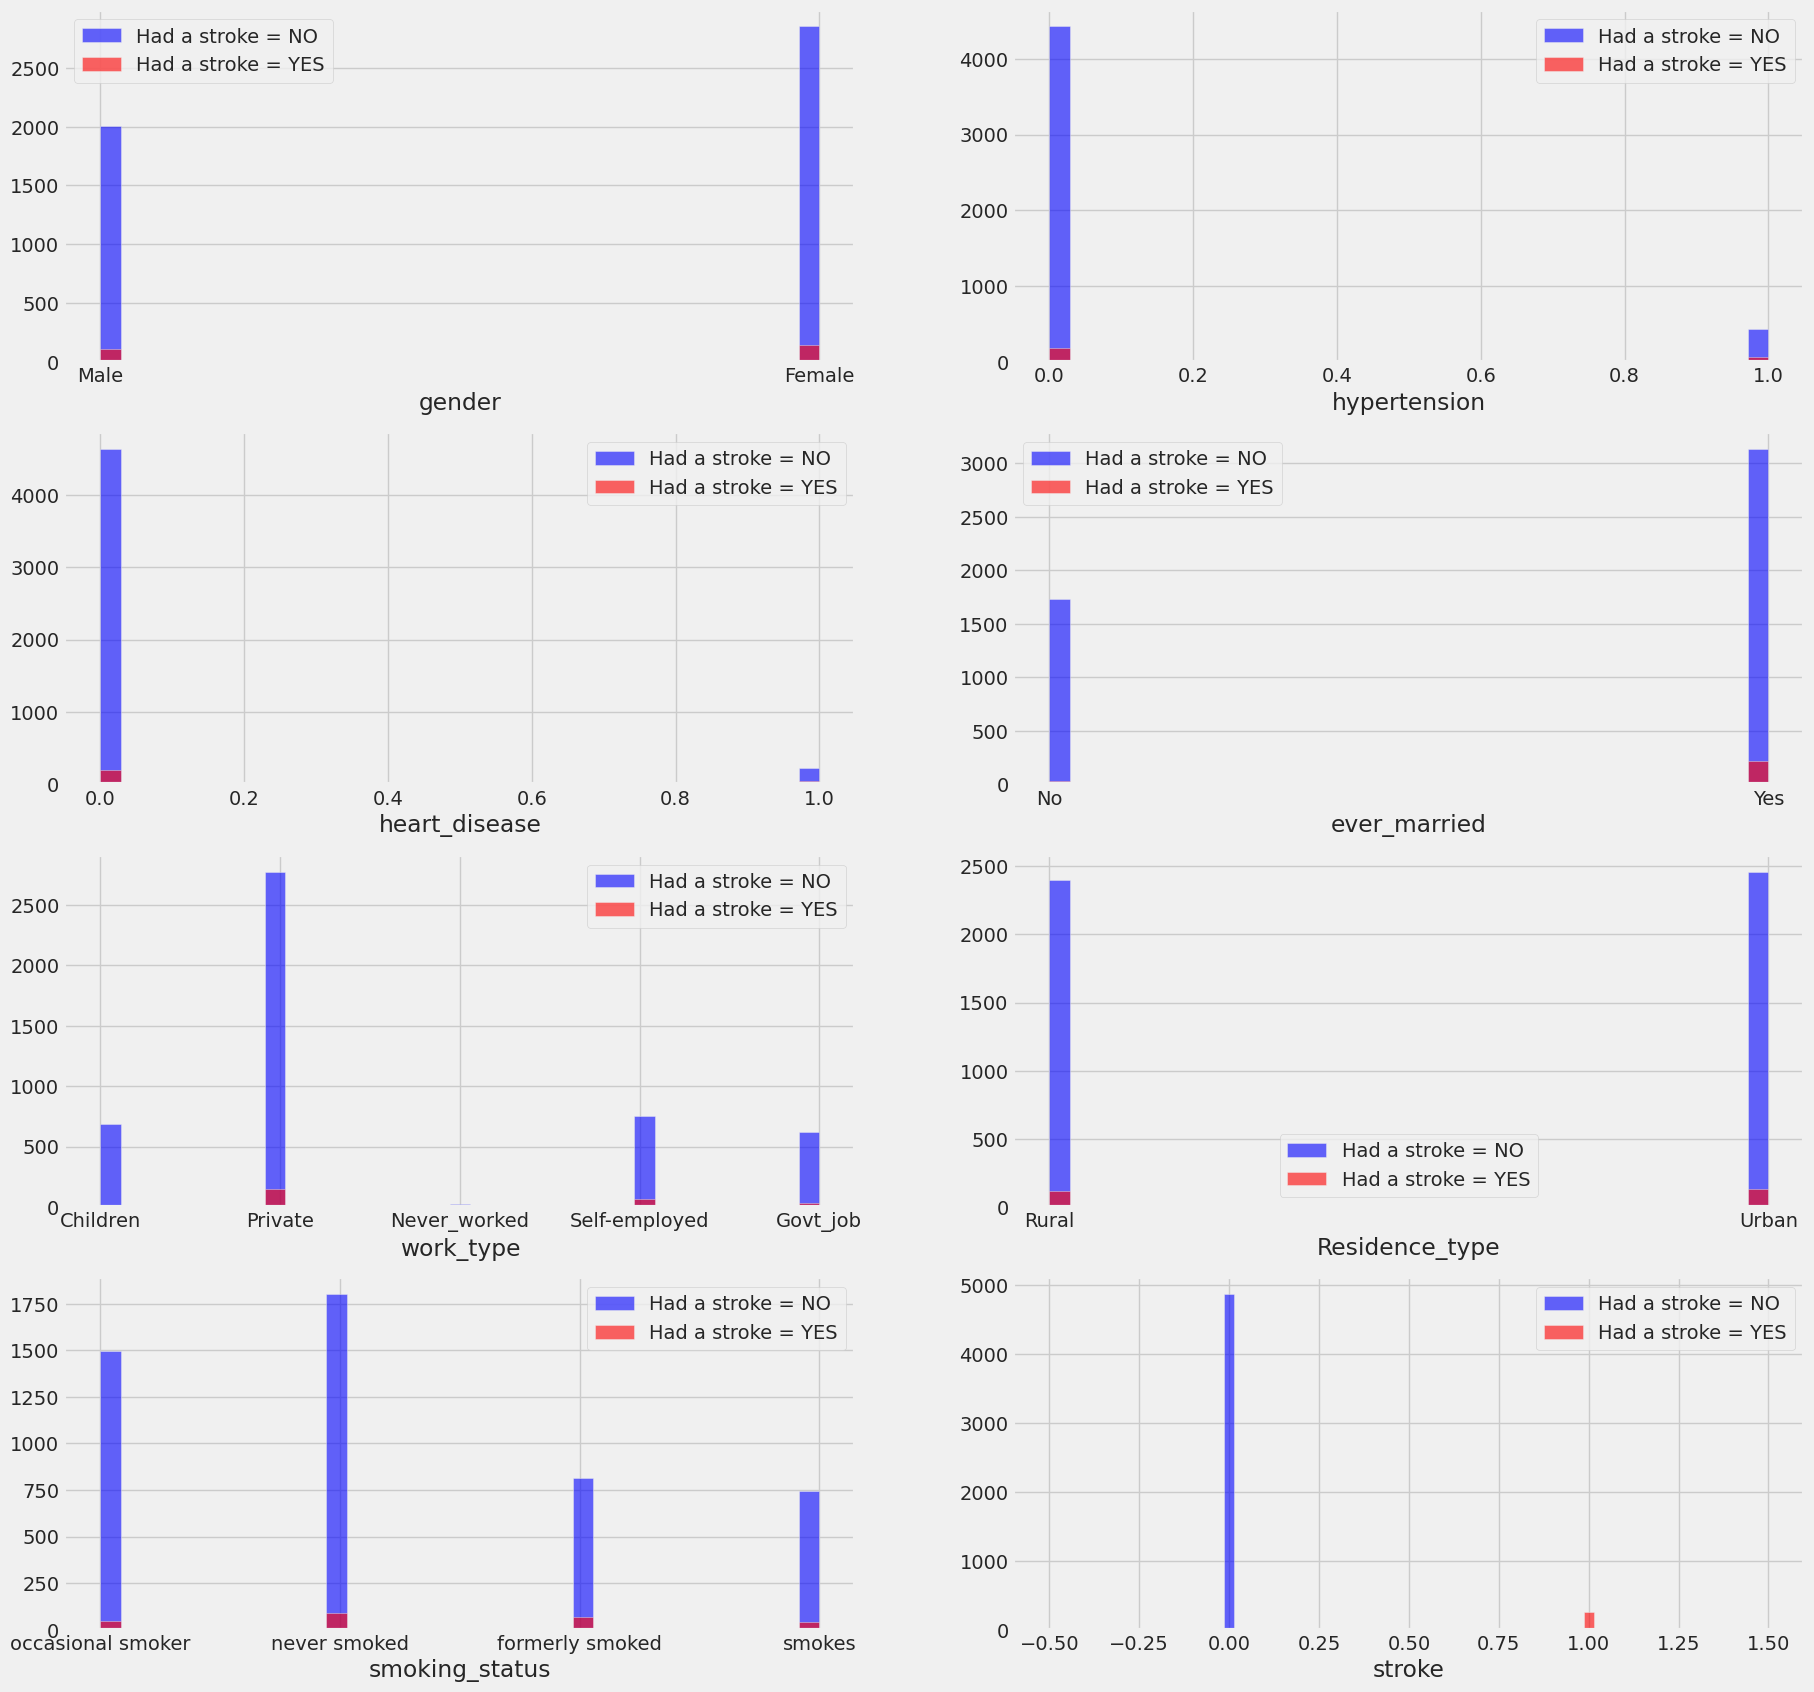

In [ ]:
# Plot histograms for all categorical features
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(4, 2 , i)
    df[df["stroke"] == 0][column].hist(bins=35, color='blue', label='Had a stroke = NO', alpha=0.6)
    df[df["stroke"] == 1][column].hist(bins=35, color='red', label='Had a stroke = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### Observations from the above plot :
1. gender {Male, Female} : Stroke targets male patients more than females.
2. hypertension {0 if the patient doesn't have hypertension, 1 if the patient has hypertension} : If the patient does not have hypertension, he has a great chance to avoid stroke.
3. heart_disease {0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease} : If the patient doesn't have cardiovascular disease, he's more likely to avoid stroke.
4. ever_married {No or Yes} : Patients who haven't been married in their lives will be spared by the stroke.
5. work_type {children, Govt_jov, Never_worked, Private or Self-employed} : patients that Never_worked are undiagnosed, children don't have a stroke, Patients who have private jobs are more likely to develop stroke than self_employed or patient with govermental jobs, may be they are more stressed by their work schedules.
6. Residence_type {Rural, Urban} : Urban life induce stroke more than rural life.
7. smoking_status {formerly smoked, never smoked, smokes or occasional smoker}: patients how have never smoked are more likely to be spared from stroke although in some cases related to life quality they may develop stroke.

In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to prints statements about null values, cardinality, and checks for constant/quasi-constant features"""
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100

    # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

### **Stroke feature (target)**

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "stroke"
df[feature].dtype

dtype('int64')

### Univariate visualization showing the distribution of a target (stroke)

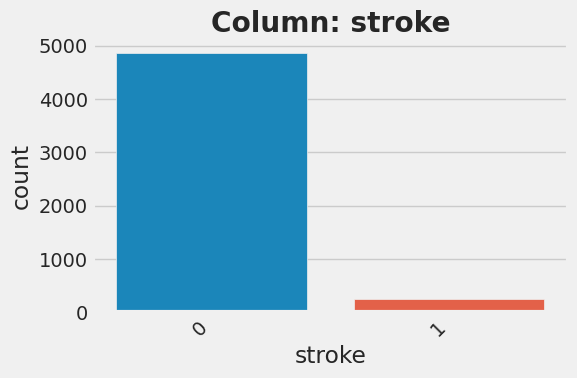

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4861 times (95.13%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

It's a categorical nominal feature : Data Dictionary says it should be 1 if the patient had a stroke or 0 if not

No missing values

not constant or quasi-constant feature

cardinality : 4861

we would know this feature BEFORE the target is determined : since it is our target!

there's an understanding reason to exclude based on our business case : its our target!

### **Gender feature**

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "gender"
df[feature].dtype

dtype('O')

### Univariate visualization showing the distribution of gender feature

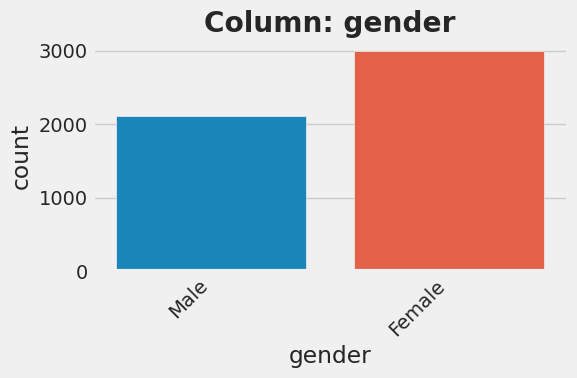

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Female' occurs 2994 times (58.59%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

* The most frequent gender category in our data is female.

### **Feature Observations**
It's a categorical nominal feature : Data Dictionary says it should be Male, Female

No missing values

not constant or quasi-constant feature

cardinality : 2 very low

we would know this feature BEFORE the target is determined

there's no a understanding reason to exclude based on our business case

### Multivariate visualization showing the distribution of gender feature

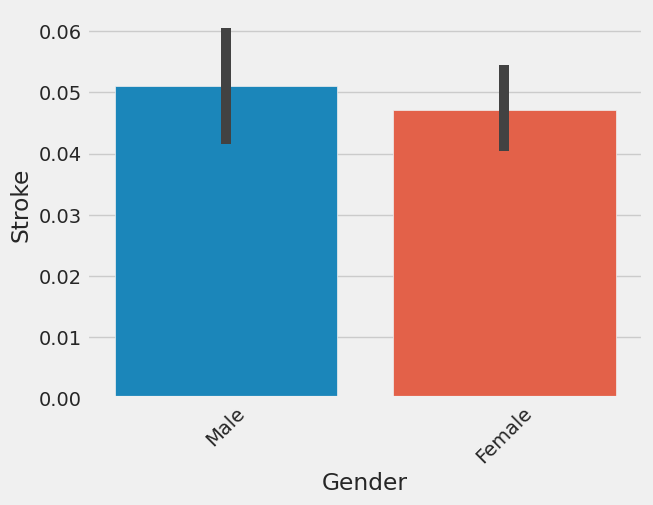

In [ ]:
sns.barplot(data=df, x='gender', y="stroke");
plt.xticks(rotation = 45);
plt.ylabel('Stroke')
plt.xlabel('Gender');

* Stroke targets male patients more than females.



### **hypertension feature**

### Univariate visualization showing the distribution of hypertension

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "hypertension"
df[feature].dtype

dtype('O')

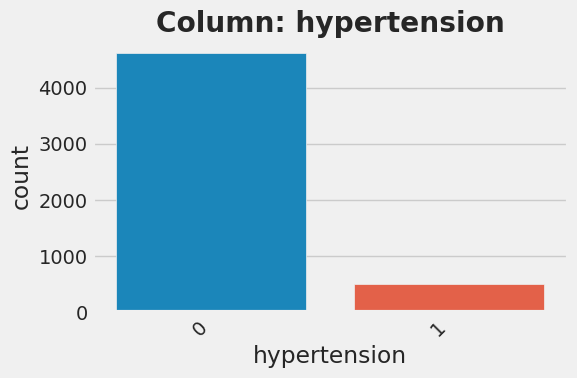

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4612 times (90.25%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

### **Feature Observations**
It's a categorical nominal feature : Data Dictionary says it should be 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.

No missing values

not constant or quasi-constant feature

cardinality : 2 very low

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### Multivariate visualization showing the distribution of hypertension feature

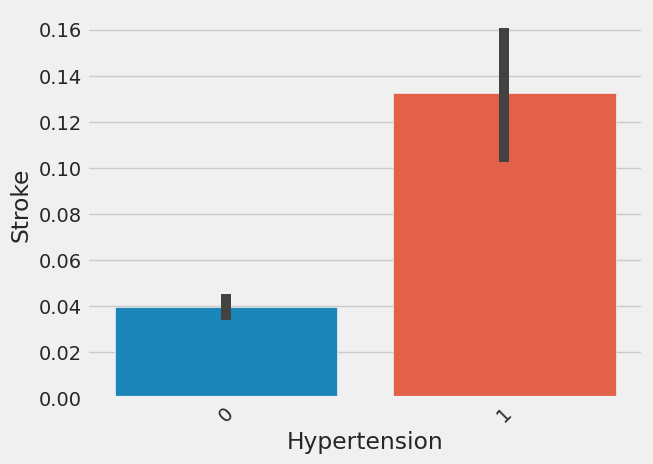

In [ ]:
sns.barplot(data=df, x='hypertension', y="stroke");
plt.xticks(rotation = 45);
plt.ylabel('Stroke')
plt.xlabel('Hypertension');

* Patients who have an hypertension lower than 0.04 are not likely to develop a stroke. High blood pressure is the biggest risk factor for stroke. It can lead to blocked arteries, it can also make them weaker, causing them to break which can cause a stroke.

### **heart_disease feature**

### Univariate visualization showing the distribution of heart_disease

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "heart_disease"
df[feature].dtype

dtype('O')

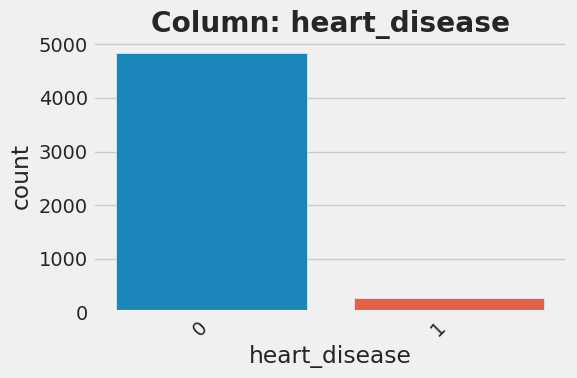

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4834 times (94.6%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

### **Feature Observations**
It's a categorical nominal feature : Data Dictionary says it should be 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

No missing values

not constant or quasi-constant feature

cardinality : 2 very low

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### Multivariate visualization showing the distribution of heart_disease feature

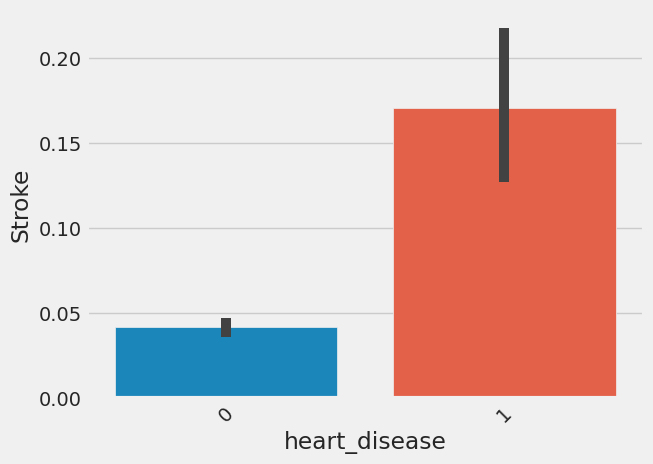

In [ ]:
sns.barplot(data=df, x='heart_disease', y="stroke");
plt.xticks(rotation = 45);
plt.ylabel('Stroke')
plt.xlabel('heart_disease');

* A high rate of cardiovascular disease necessarily leads to a stroke

### **ever_married feature**

### Univariate visualization showing the distribution of ever_married

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "ever_married"
df[feature].dtype

dtype('O')

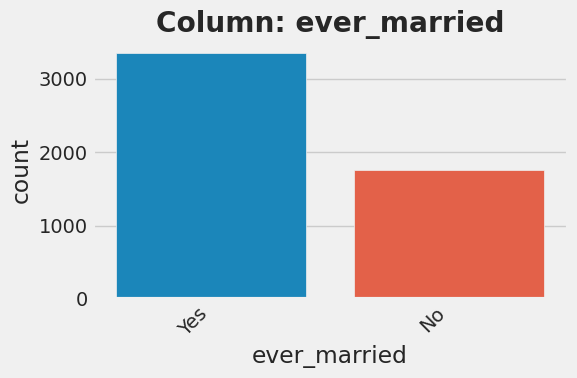

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Yes' occurs 3353 times (65.62%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

### **Feature Observations**
It's a categorical nominal feature : Data Dictionary says it should be "No" or "Yes".

No missing values

not constant or quasi-constant feature

cardinality : 2 very low

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### Multivariate visualization showing the distribution of ever_married feature

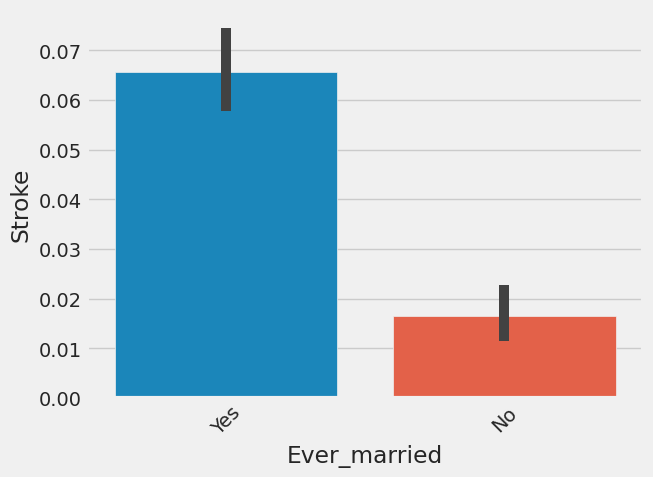

In [ ]:
sns.barplot(data=df, x='ever_married', y="stroke");
plt.xticks(rotation = 45);
plt.ylabel('Stroke')
plt.xlabel('Ever_married');

* Patients who have been married at least once in their lives develop more stroke than single ones may be due to the conflicts between spouses.

### **work_type feature**

### Univariate visualization showing the distribution of work_type

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "work_type"
df[feature].dtype

dtype('O')

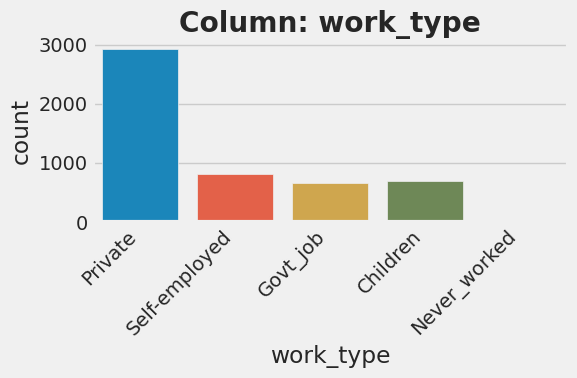

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Private' occurs 2925 times (57.24%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

### **Feature Observations**
It's a categorical nominal feature : Data Dictionary says it should be children, Govt_jov, Never_worked, Private or Self-employed

No missing values

not constant or quasi-constant feature

cardinality : 5

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### Multivariate visualization showing the distribution of work_type feature

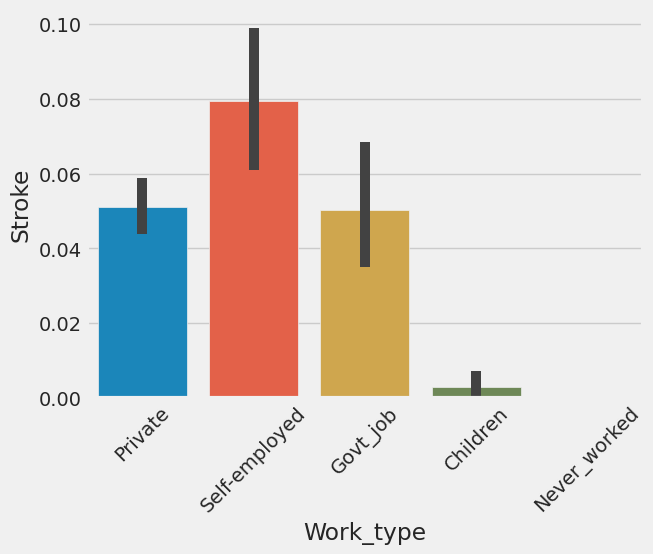

In [ ]:
sns.barplot(data=df, x='work_type', y="stroke");
plt.xticks(rotation = 45);
plt.ylabel('Stroke')
plt.xlabel('Work_type');

* Patients who have private or government jobs are equally affected by a stroke, self employed are the most affected may be because their condition is more stressful than patients with a fixed salary, patients who have never worked are not affected by a stroke. So stress is the trigger for stroke.

### **Residence_type feature**

### Univariate visualization showing the distribution of Residence_type

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Residence_type"
df[feature].dtype

dtype('O')

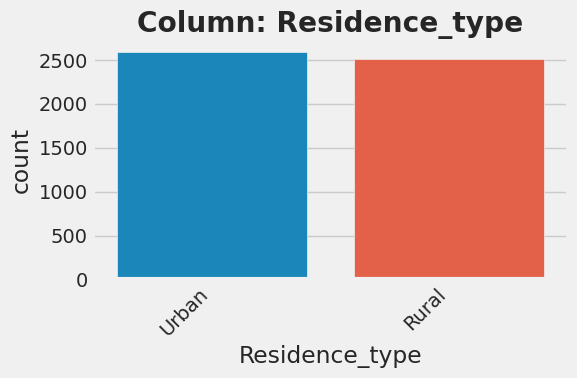

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Urban' occurs 2596 times (50.8%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

### **Feature Observations**
It's a categorical nominal feature : Data Dictionary says it should be Rural or Urban

No missing values

not constant or quasi-constant feature

cardinality : 2 very low

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### Multivariate visualization showing the distribution of Residence_type feature

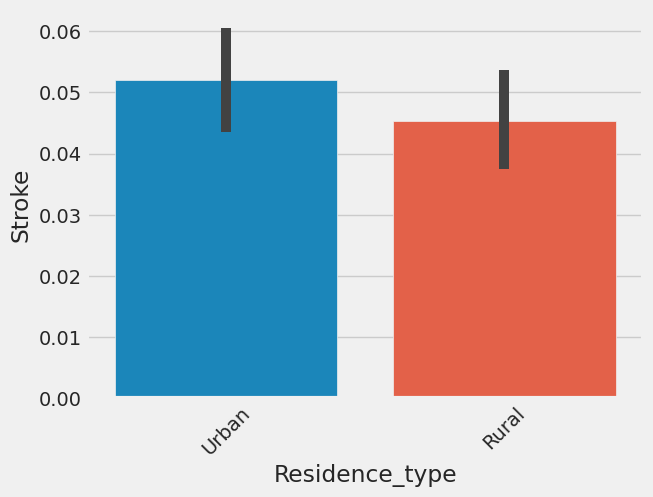

In [ ]:
sns.barplot(data=df, x='Residence_type', y="stroke");
plt.xticks(rotation = 45);
plt.ylabel('Stroke')
plt.xlabel('Residence_type');

* Urban life induces stroke much more than rural life.

### **smoking_status feature**

### Univariate visualization showing the distribution of smoking_status

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "smoking_status"
df[feature].dtype

dtype('O')

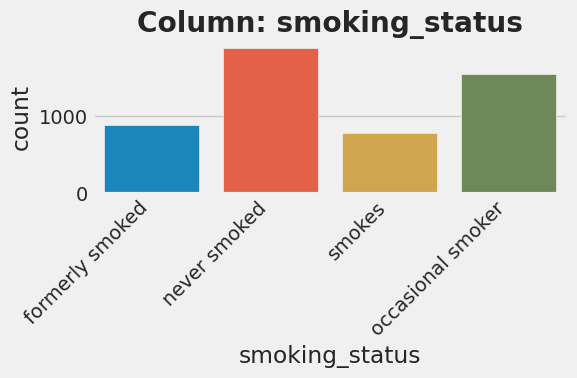

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'never smoked' occurs 1892 times (37.03%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

### **Feature Observations**
It's a categorical nominal feature : Data Dictionary says it should be formerly smoked, never smoked, smokes or occasional smoker

No missing values

not constant or quasi-constant feature

cardinality : 4

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### Multivariate visualization showing the distribution of smoking_status feature

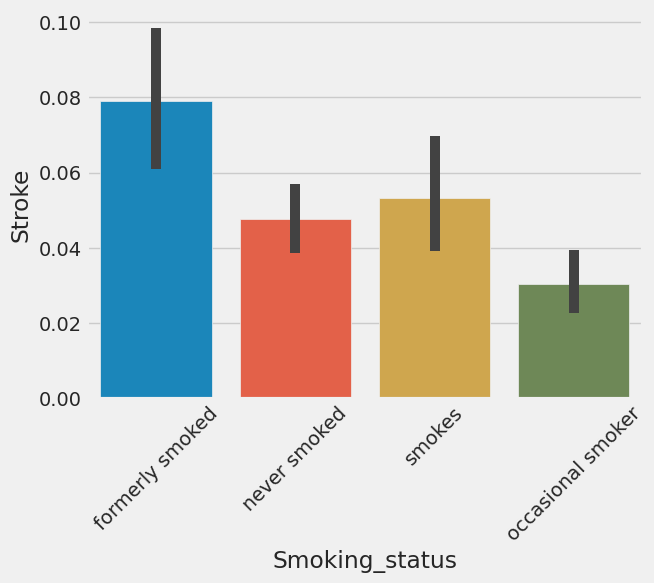

In [ ]:
sns.barplot(data=df, x='smoking_status', y="stroke");
plt.xticks(rotation = 45);
plt.ylabel('Stroke')
plt.xlabel('Smoking_status');

* Patients who are formaly smoked or smokes are most susceptible to stroke. Patients that never smoked may have a stroke more than the occasional smokers maybe they have poor or unhealthy life quality.

### > **The task is to help doctors to predict a stroke for at-risk patients : It's a Binary Classification Prediction.**

In [ ]:
# Check dataframe before preprocessing
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 439.3+ KB


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **PREPROCESSING PIPELINE**

In [ ]:
## Define X and y
target = 'stroke'
X = df.drop(columns=target).copy()
y = df[target].copy()
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [ ]:
# Perfoming a train-test-split : ALWAYS SPLIT BEFORE IMPUTING to avoid data leakage, we use stratify because the dataset is highly (super) unbalanced.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)
print('Train Size', X_train.shape[0])
print('Test Size', X_test.shape[0])

Train Size 3832
Test Size 1278


In [ ]:
# Showing X_train and y_train
display(X_train.head(), y_train.head())

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
837,Female,39.0,0,0,No,Govt_job,Urban,79.44,22.7,never smoked
2899,Male,55.0,0,0,Yes,Private,Urban,68.79,27.0,never smoked
708,Female,59.0,0,0,Yes,Private,Urban,240.71,43.9,formerly smoked
3144,Female,79.0,0,0,No,Self-employed,Rural,82.07,30.4,occasional smoker
4920,Female,75.0,0,0,Yes,Private,Rural,68.38,33.8,occasional smoker


837     0
2899    0
708     0
3144    0
4920    0
Name: stroke, dtype: int64

In [ ]:
# Showing X_test and y_test
display(X_test.head(), y_test.head())

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1602,Female,62.0,0,0,Yes,Govt_job,Rural,73.44,23.4,occasional smoker
2966,Male,80.0,1,0,Yes,Self-employed,Rural,232.12,28.8,never smoked
1433,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked
2738,Female,43.0,0,0,Yes,Private,Urban,110.42,32.6,smokes
916,Male,63.0,0,0,Yes,Private,Rural,57.82,28.8,formerly smoked


1602    0
2966    0
1433    0
2738    0
916     0
Name: stroke, dtype: int64

In [ ]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Create the preprocessing pipeline for numeric data
num_selector = make_column_selector(dtype_include='number')
# The imputation strategy: 'mean', replace missing values using the mean along each column
mean_imputer = SimpleImputer(strategy='mean') #
scaler = StandardScaler()
num_pipe = make_pipeline(mean_imputer, scaler)
# Make the tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_selector)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7a92ad4655a0>)

In [ ]:
num_selector(X_train)

['age', 'avg_glucose_level', 'bmi']

In [ ]:
# PREPROCESSING PIPELINE FOR NOMINAL DATA
# Save list of column names
cat_selector = make_column_selector(dtype_include='object')
# Create imputer for nominal data
# The imputation strategy: 'constant', replace missing values with fill_value
const_imputer = SimpleImputer(strategy='constant')
## Making the OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
## Making an cat_pipe
cat_pipe = make_pipeline(const_imputer, ohe_encoder)
cat_pipe
## Make a nominal tuple for ColumnTransformer
cat_tuple = ('categorical', cat_pipe, cat_selector)
cat_tuple

('categorical',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7a92ad20ef80>)

In [ ]:
cat_selector(X_train)

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

### Create a ColumnTransformer

In [ ]:
# Instantiate the column transformer
preprocessor = ColumnTransformer([num_tuple, cat_tuple],
                                 verbose_feature_names_out=False)
# Fit the preprocessor on Training Data Only
X_train_processed = preprocessor.fit(X_train)
X_train_processed

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a92ad4655a0>),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a92ad20ef80>)],
                  verbose_feature_names_out=False)

In [ ]:
# Inspect the column transformer steps
preprocessor.named_transformers_

{'numeric': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'categorical': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))])}

In [ ]:
# Fit the column transformer on the X_train
X_train_processed = preprocessor.fit(X_train)

# Transform the X_train and the X_test
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# View the processed training & testing data
display(X_train_transformed, X_test_transformed)

,age,avg_glucose_level,bmi,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_occasional smoker,smoking_status_smokes
837,-0.208952,-0.589808,-0.802271,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2899,0.510257,-0.827422,-0.244806,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
708,0.690059,3.008316,1.946160,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3144,1.589070,-0.531129,0.195980,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4920,1.409268,-0.836569,0.636766,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


,age,avg_glucose_level,bmi,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_occasional smoker,smoking_status_smokes
1602,0.824911,-0.723675,-0.711520,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2966,1.634021,2.816663,-0.011449,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1433,0.465306,-0.437645,0.805302,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2738,-0.029150,0.101393,0.481195,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
916,0.869861,-1.072175,-0.011449,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# **MODEL DEVELOPMENT**

We will evaluate 4 types of Models on train & test data with Classification Report, Normalized Confusion Matrix & ROC curves :

2 Sequential Models :
>* LGBMClassifier
* XGBClassifier

2 Ensemble Sequential Models :
> * ensemble.AdaBoostClassifier
* ensemble.GradientBoostingClassifier

2 Linear Models :
> * linear_model.LogisticRegression
* linear_model.SGDClassifier

2 Ensemble Parallel Models :
> * ensemble.BaggingClassifier
* ensemble.RandomForestClassifier

--> for LGBMClassifier & XGBClassifier, I will evaluate the default models without any regularization.

--> for AdaBoostClassifier & GradientBoostingClassifier, I will tunned some hyperparameters with RandomizedSearchCV.

--> for LogisticRegression & SGDClassifier, I will use Class Weights to tell the relative importance of each class, using class_weight='balanced'.

--> for BaggingClassifier & RandomForestClassifier, I will use Random Undersampling to make data more balance.

In [ ]:
# The style to the default Matplotlib
plt.style.use('default')

In [ ]:
## Metrics for classification Import
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

# Define a function that takes in arguments and prints out a classification report, confusion matrix and ROC AUC
def evaluate_classification(model_pipe, X_train, y_train, X_test, y_test, cmap='Blues',
                            normalize='true', classes=None, figsize=(20, 5)):

  train_preds = model_pipe.predict(X_train)
  test_preds = model_pipe.predict(X_test)

  print('Classification Report for Train Data')
  print(metrics.classification_report(y_train, train_preds, target_names=classes))
  print('Classification Report for Test Data')
  print(metrics.classification_report(y_test, test_preds, target_names=classes))


  fig, axes = plt.subplots(ncols=2, figsize=(8,4))

  ConfusionMatrixDisplay.from_estimator(model_pipe, X_train, y_train, cmap='Blues',
                                        display_labels=classes, normalize='true',
                                        ax=axes[0])
  axes[0].set_title("Train Data");

  ConfusionMatrixDisplay.from_estimator(model_pipe, X_test, y_test, cmap='Blues',
                                        display_labels=classes, normalize='true',
                                        ax=axes[1])
  axes[1].set_title("Test Data");

  fig.suptitle("Confusion Matrices")
  fig.tight_layout()
  plt.show()

  fig, axes = plt.subplots(ncols=2, figsize=(8,4))

  curve = RocCurveDisplay.from_estimator(model_pipe, X_train, y_train, ax=axes[0])
  curve.ax_.grid()
  curve.ax_.plot([0,1], [0,1], ls='--', label ='Baseline (AUC = 0.5)')
  axes[0].legend();
  axes[0].set_title('Train Data')

  curve = RocCurveDisplay.from_estimator(model_pipe, X_test, y_test, ax=axes[1])
  curve.ax_.grid()
  curve.ax_.plot([0,1], [0,1], ls='--', label ='Baseline (AUC = 0.5)')
  axes[1].legend();
  axes[1].set_title('Test Data')

  fig.suptitle('ROC Curves')
  fig.tight_layout()
  plt.show()

## **LGBMClassifier**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 187, number of negative: 3645
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 3832, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048800 -> initscore=-2.970003
[LightGBM] [Info] Start training from score -2.970003
Classification Report for Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3645
           1       1.00      0.91      0.95       187

    accuracy                           1.00      3832
   macro avg       1.00      0.95      0.98      3832
weighted avg       1.00      1.00      1.00      3832



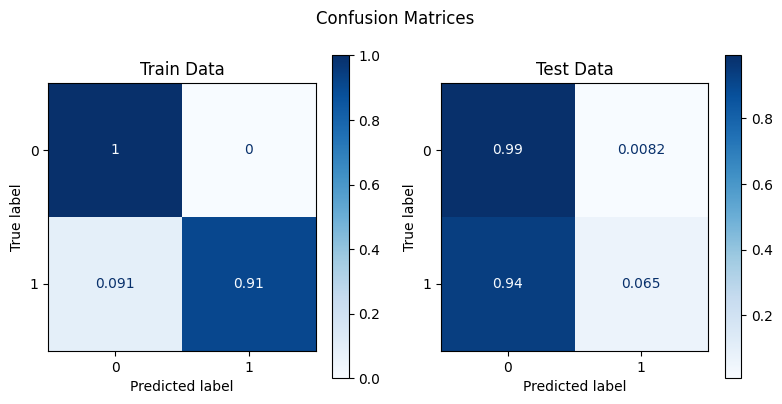

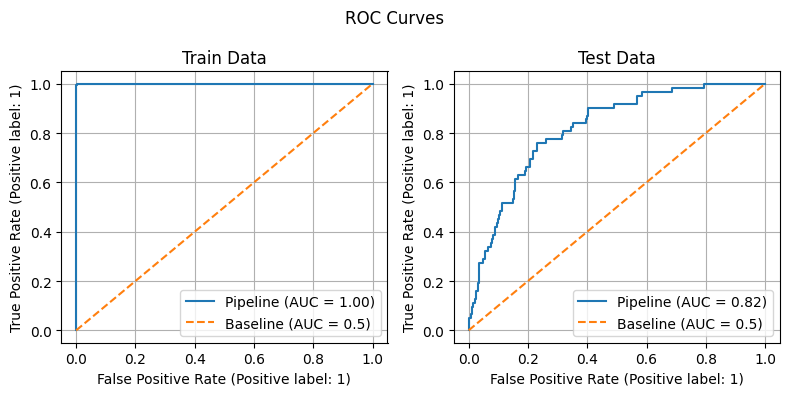

CPU times: user 1.95 s, sys: 135 ms, total: 2.08 s
Wall time: 3.19 s


In [ ]:
%%time
from lightgbm import LGBMClassifier
# Instantiate and fit LGBMClassifier pipe
lgbm_pipe = make_pipeline(preprocessor, LGBMClassifier())
lgbm_pipe.fit(X_train_transformed, y_train)
# Evaluate Model
train_preds = lgbm_pipe.predict(X_train_transformed)
test_preds = lgbm_pipe.predict(X_test_transformed)
evaluate_classification(lgbm_pipe, X_train_transformed, y_train, X_test_transformed, y_test)

## **XGBClassifier**

Classification Report for Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3645
           1       1.00      0.97      0.98       187

    accuracy                           1.00      3832
   macro avg       1.00      0.98      0.99      3832
weighted avg       1.00      1.00      1.00      3832

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1216
           1       0.40      0.10      0.16        62

    accuracy                           0.95      1278
   macro avg       0.68      0.54      0.56      1278
weighted avg       0.93      0.95      0.93      1278



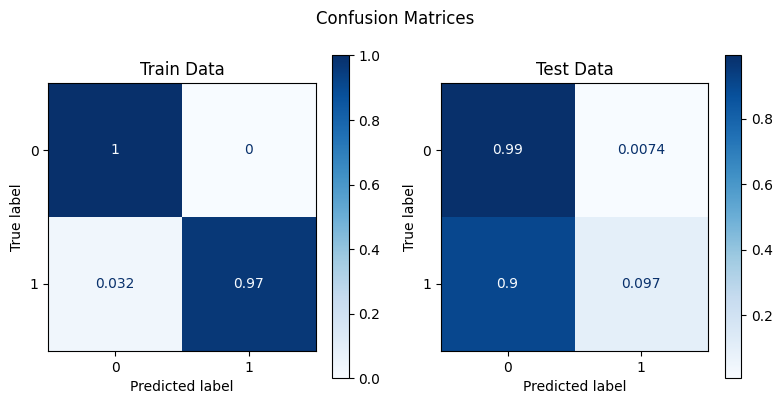

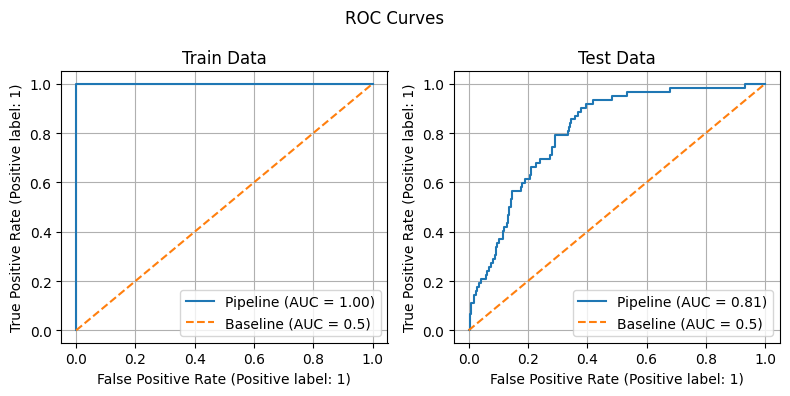

CPU times: user 2.54 s, sys: 262 ms, total: 2.8 s
Wall time: 2 s


In [ ]:
%%time
from xgboost import XGBClassifier
# Instantiate and fit XGBClassifier pipe
xgboost_pipe = make_pipeline(preprocessor, XGBClassifier())
xgboost_pipe.fit(X_train_transformed, y_train)
# Evaluate Model
train_preds = xgboost_pipe.predict(X_train_transformed)
test_preds = xgboost_pipe.predict(X_test_transformed)
evaluate_classification(xgboost_pipe, X_train_transformed, y_train, X_test_transformed, y_test)

* For Sequential Models such LGBMClassifier & XGBClassifier, they give perfect accuracy on train set = 1 & on test set = 0.95, the of LGBM AUC is slightly better compared to the XGBC AUC on test set.

## **AdaBoostClassifier with RandomizedSearchCV**

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3645
           1       0.75      0.02      0.03       187

    accuracy                           0.95      3832
   macro avg       0.85      0.51      0.50      3832
weighted avg       0.94      0.95      0.93      3832

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1216
           1       0.25      0.02      0.03        62

    accuracy                           0.95      1278
   macro avg       0.60      0.51      0.50      1278
weighted avg       0.92      0.95      0.93      1278



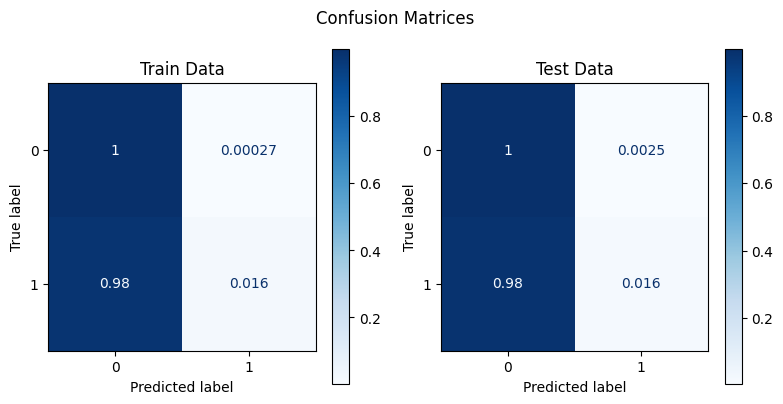

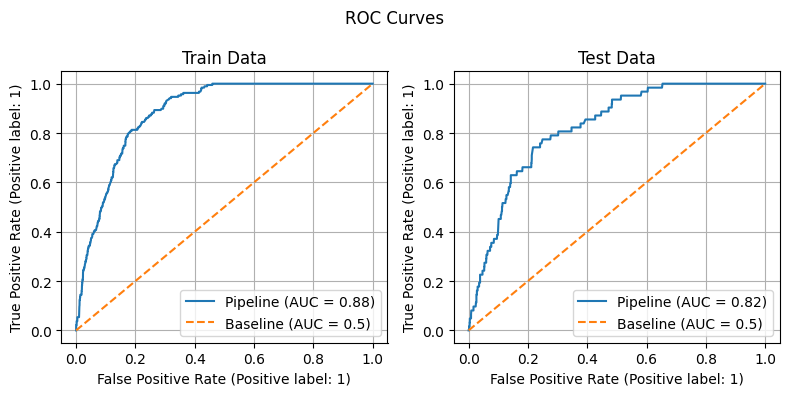

CPU times: user 2.23 s, sys: 203 ms, total: 2.43 s
Wall time: 2.48 s


In [ ]:
%%time
from sklearn.ensemble import AdaBoostClassifier
# Instantiate and fit AdaBoostClassifier pipe
ada_pipe = make_pipeline(preprocessor, AdaBoostClassifier())
ada_pipe.fit(X_train_transformed, y_train)
# Evaluate Model
train_preds = ada_pipe.predict(X_train_transformed)
test_preds = ada_pipe.predict(X_test_transformed)
evaluate_classification(ada_pipe, X_train_transformed, y_train , X_test_transformed, y_test)

In [ ]:
# Looking at some hyperparameters that seem tunable
ada_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7a92ad4655a0>),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                              

In [ ]:
# Try to tune some hyperparameters : Create a paramater distribution for RandomizedSearchCV
pipe_param_distributions = dict({'adaboostclassifier__n_estimators': [10, 20, 30, 40, 50],
                                 'adaboostclassifier__learning_rate':[0.1, 0.5, 1, 1.5, 2]})

{'adaboostclassifier__n_estimators': 10, 'adaboostclassifier__learning_rate': 0.5}
Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3645
           1       0.00      0.00      0.00       187

    accuracy                           0.95      3832
   macro avg       0.48      0.50      0.49      3832
weighted avg       0.90      0.95      0.93      3832

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



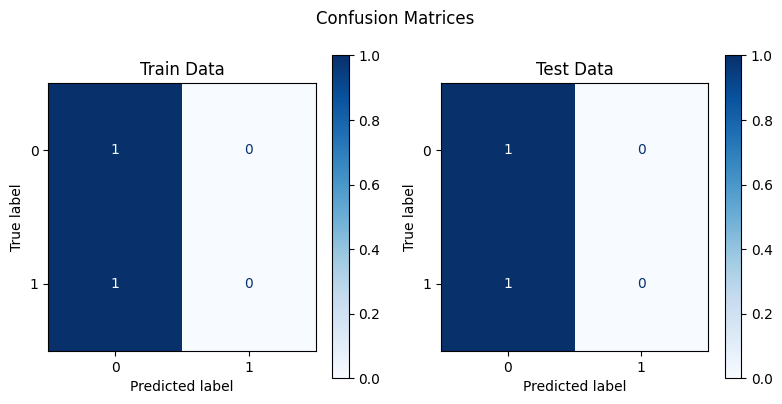

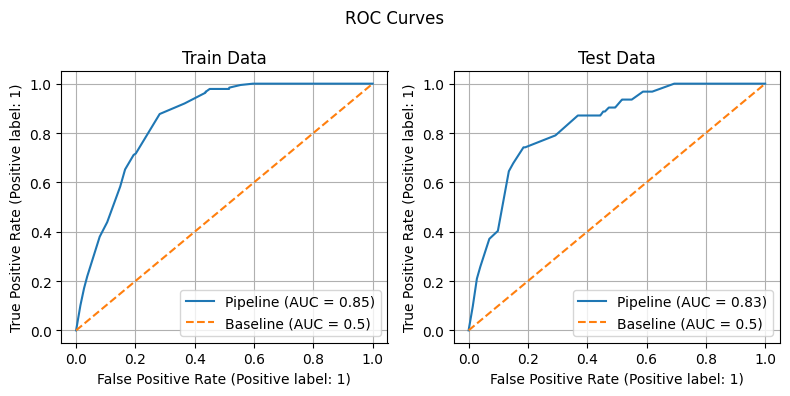

CPU times: user 8.39 s, sys: 311 ms, total: 8.7 s
Wall time: 8.52 s


In [ ]:
%%time
# Instantiate and fit Randomized AdaBoostClassifier pipe
adaRSCV_pipe=RandomizedSearchCV(ada_pipe, pipe_param_distributions)
adaRSCV_pipe.fit(X_train_transformed, y_train)
# Get out the best parameters & the best model
print(adaRSCV_pipe.best_params_)
best_pipe = adaRSCV_pipe.best_estimator_
# Evaluate best model using custom function
train_preds = best_pipe.predict(X_train_transformed)
test_preds = best_pipe.predict(X_test_transformed)
evaluate_classification(best_pipe, X_train_transformed, y_train, X_test_transformed, y_test)

## **GradientBoostingClassifier with RandomizedSearchCV**

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3645
           1       1.00      0.16      0.28       187

    accuracy                           0.96      3832
   macro avg       0.98      0.58      0.63      3832
weighted avg       0.96      0.96      0.94      3832

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1216
           1       0.33      0.02      0.03        62

    accuracy                           0.95      1278
   macro avg       0.64      0.51      0.50      1278
weighted avg       0.92      0.95      0.93      1278



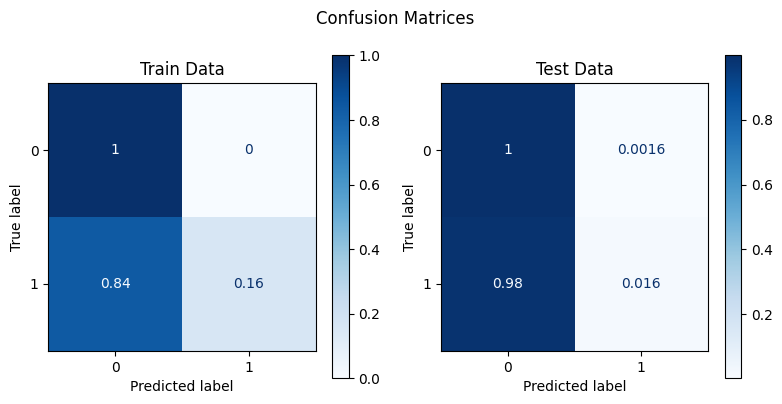

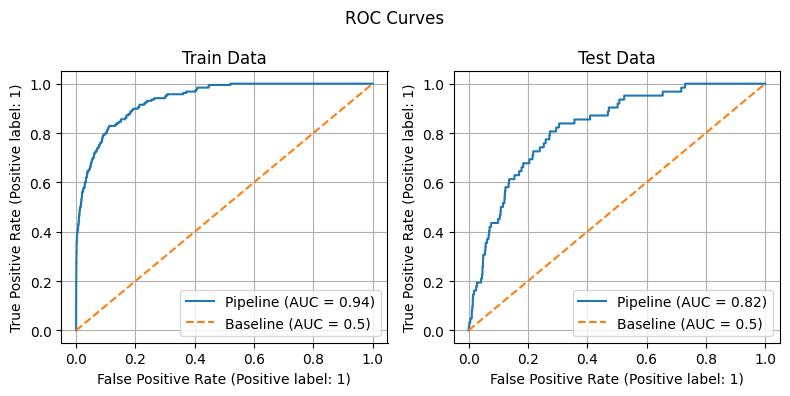

CPU times: user 1.89 s, sys: 285 ms, total: 2.18 s
Wall time: 1.88 s


In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
# Instantiate and fit AdaBoostClassifier pipe
gbc_pipe = make_pipeline(preprocessor, GradientBoostingClassifier())
gbc_pipe.fit(X_train_transformed, y_train)
# Evaluate Model
train_preds = gbc_pipe.predict(X_train_transformed)
test_preds = gbc_pipe.predict(X_test_transformed)
evaluate_classification(gbc_pipe, X_train_transformed, y_train , X_test_transformed, y_test)

In [ ]:
# Looking at some hyperparameters that seem tunable
gbc_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7a92ad4655a0>),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                              

In [ ]:
# Try to tune some hyperparameters : Create a paramater distribution for RandomizedSearchCV
pipe_param_distributions = dict({'gradientboostingclassifier__n_estimators':[100, 300, 500],
                                'gradientboostingclassifier__learning_rate':[0.1, 0.5, 1, 1.5, 2],
                                'gradientboostingclassifier__min_samples_split':[2,4,6],
                                'gradientboostingclassifier__min_samples_leaf':[1,3,5]})

{'gradientboostingclassifier__n_estimators': 500, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__min_samples_leaf': 5, 'gradientboostingclassifier__learning_rate': 0.5}
Classification Report for Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3645
           1       0.96      0.99      0.98       187

    accuracy                           1.00      3832
   macro avg       0.98      0.99      0.99      3832
weighted avg       1.00      1.00      1.00      3832

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1216
           1       0.28      0.13      0.18        62

    accuracy                           0.94      1278
   macro avg       0.62      0.56      0.57      1278
weighted avg       0.92      0.94      0.93      1278



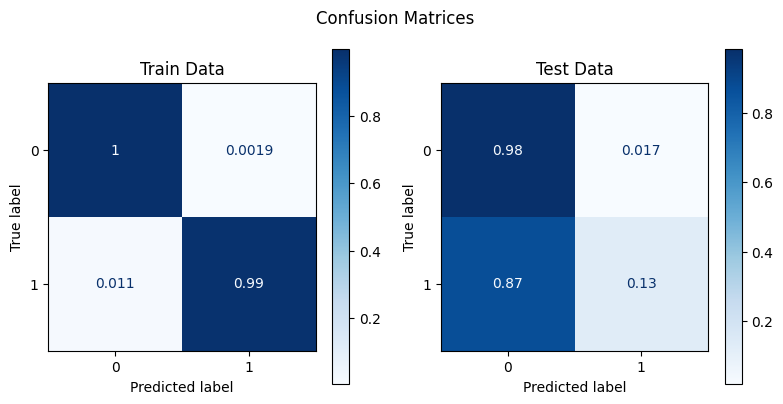

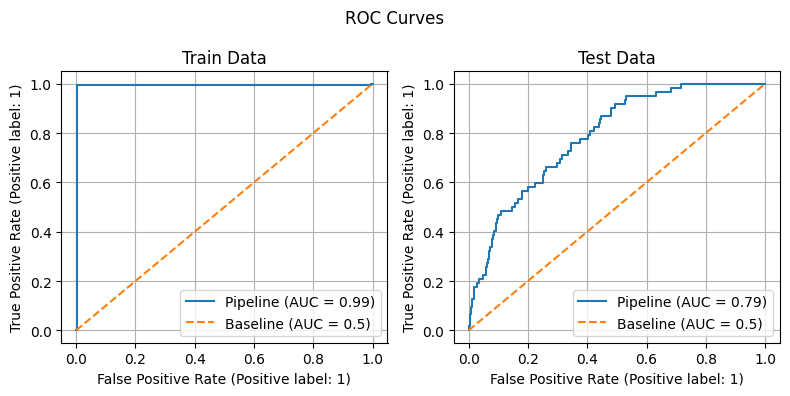

CPU times: user 1min 9s, sys: 382 ms, total: 1min 9s
Wall time: 1min 9s


In [ ]:
%%time
# Instantiate and fit Randomized AdaBoostClassifier pipe
gbcRSCV_pipe=RandomizedSearchCV(gbc_pipe, pipe_param_distributions)
gbcRSCV_pipe.fit(X_train_transformed, y_train)
# Get out the best parameters & the best model
print(gbcRSCV_pipe.best_params_)
best_pipe = gbcRSCV_pipe.best_estimator_
# Evaluate best model using custom function
train_preds = best_pipe.predict(X_train_transformed)
test_preds = best_pipe.predict(X_test_transformed)
evaluate_classification(best_pipe, X_train_transformed, y_train, X_test_transformed, y_test)

* For Ensemble Sequential Models such AdaBoostClassifier & GradientBoostingClassifier Randomised, AdaBoostClassifier performs better on test set wit an AUC =0.84 & accuracy =0.95.

## **LogisticRegression with Class Weight Balanced**

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      3645
           1       0.14      0.82      0.24       187

    accuracy                           0.74      3832
   macro avg       0.56      0.78      0.54      3832
weighted avg       0.95      0.74      0.81      3832

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1216
           1       0.13      0.79      0.22        62

    accuracy                           0.73      1278
   macro avg       0.56      0.76      0.53      1278
weighted avg       0.94      0.73      0.81      1278



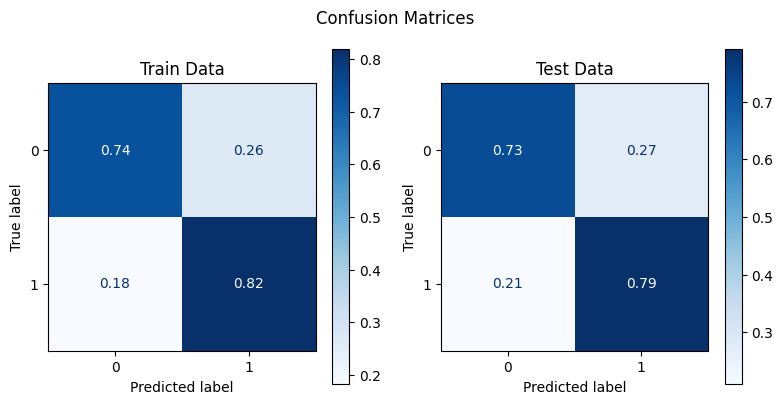

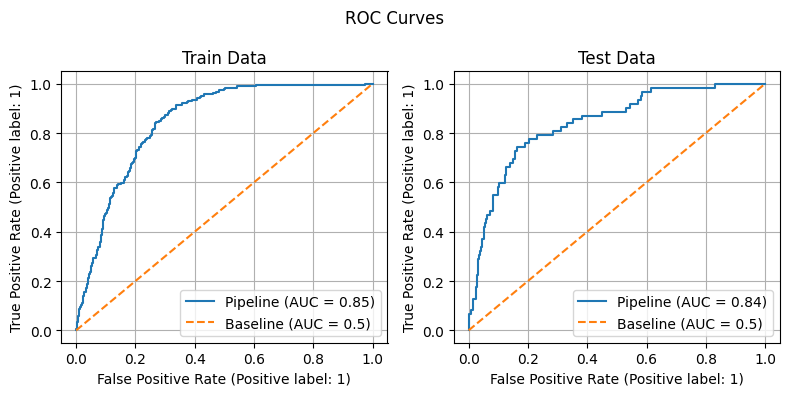

CPU times: user 1.33 s, sys: 524 ms, total: 1.86 s
Wall time: 1.28 s


In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
# Instantiate and fit LogisticRegression classifier pipe
logreg_pipe = make_pipeline(preprocessor, LogisticRegression(class_weight='balanced'))
logreg_pipe.fit(X_train_transformed, y_train)
# Evaluate Model
train_preds = logreg_pipe.predict(X_train_transformed)
test_preds = logreg_pipe.predict(X_test_transformed)
evaluate_classification(logreg_pipe,X_train_transformed, y_train, X_test_transformed, y_test)

## **SGDClassifier with Class Weight Balanced**

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      3645
           1       0.12      0.68      0.21       187

    accuracy                           0.75      3832
   macro avg       0.55      0.72      0.53      3832
weighted avg       0.94      0.75      0.82      3832

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1216
           1       0.12      0.71      0.21        62

    accuracy                           0.74      1278
   macro avg       0.55      0.73      0.53      1278
weighted avg       0.94      0.74      0.81      1278



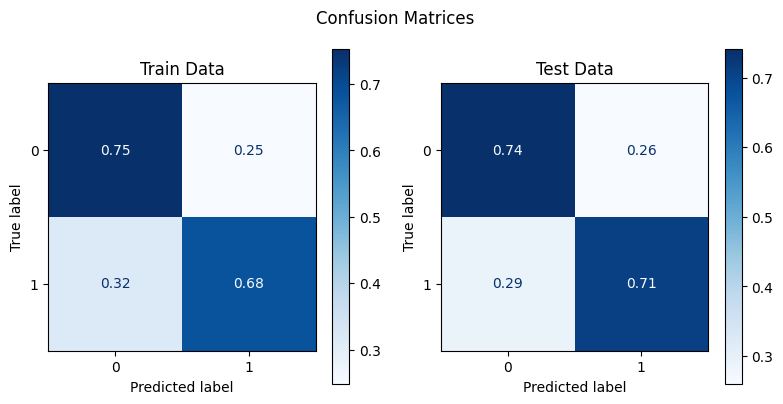

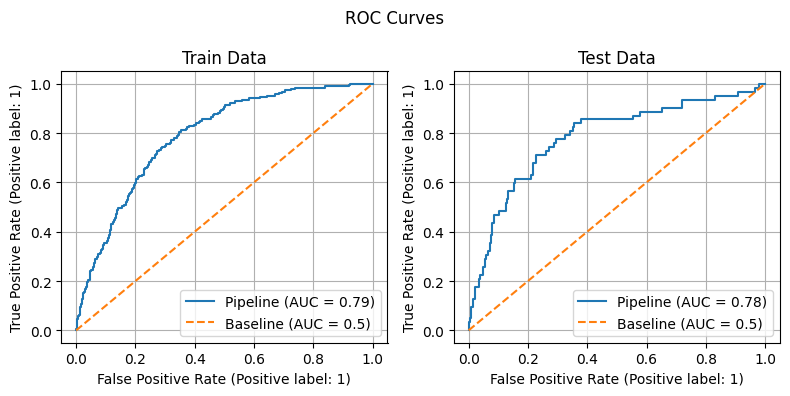

CPU times: user 1.64 s, sys: 536 ms, total: 2.17 s
Wall time: 1.59 s


In [ ]:
%%time
from sklearn.linear_model import SGDClassifier
# Instantiate and fit SGDClassifier pipe
sgd_pipe = make_pipeline(preprocessor, SGDClassifier(class_weight='balanced'))
sgd_pipe.fit(X_train_transformed, y_train)
# Evaluate Model
train_preds = sgd_pipe.predict(X_train_transformed)
test_preds = sgd_pipe.predict(X_test_transformed)
evaluate_classification(sgd_pipe,X_train_transformed, y_train, X_test_transformed, y_test)

* For Linear Models with Class Weight Balanced such as Logistic Regression & SGDClassifier, LogisticRegression has a better AUC = 0.84 on test set & SGDClassifier has slithly better accuracy =0.74

### **Random Undersampling**

In [ ]:
# Check unbalance in y_train & y_test
display(pd.Series(y_train).value_counts(), pd.Series(y_test).value_counts())

0    3645
1     187
Name: stroke, dtype: int64

0    1216
1      62
Name: stroke, dtype: int64

In [ ]:
#import imblearn pipeline
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.under_sampling import RandomUnderSampler
#create scaler and under sampler pipeline
under_sampler = RandomUnderSampler()
scaler = StandardScaler()
under_sample_pipe = make_sampler_pipeline(scaler, under_sampler)
#Compare the shape and value counts of the remaining data.
X_train_under, y_train_under = under_sample_pipe.fit_resample(X_train_transformed, y_train)
print('Original X_train class balance')
print(y_train.value_counts())
print('\nUndersampled X_train_under class balance')
y_train_under = pd.Series(y_train_under)
print(y_train_under.value_counts())

Original X_train class balance
0    3645
1     187
Name: stroke, dtype: int64

Undersampled X_train_under class balance
0    187
1    187
Name: stroke, dtype: int64


## **BaggingClassifier with Random Undersampling**

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      3645
           1       0.15      0.93      0.26       187

    accuracy                           0.74      3832
   macro avg       0.57      0.83      0.55      3832
weighted avg       0.95      0.74      0.82      3832

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1216
           1       0.12      0.73      0.21        62

    accuracy                           0.73      1278
   macro avg       0.55      0.73      0.52      1278
weighted avg       0.94      0.73      0.81      1278



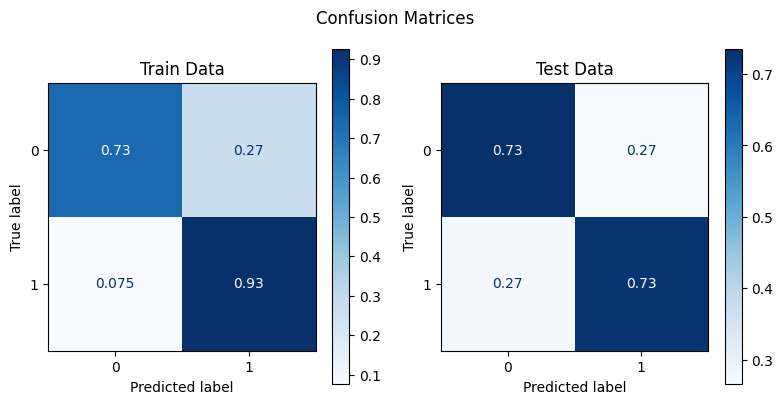

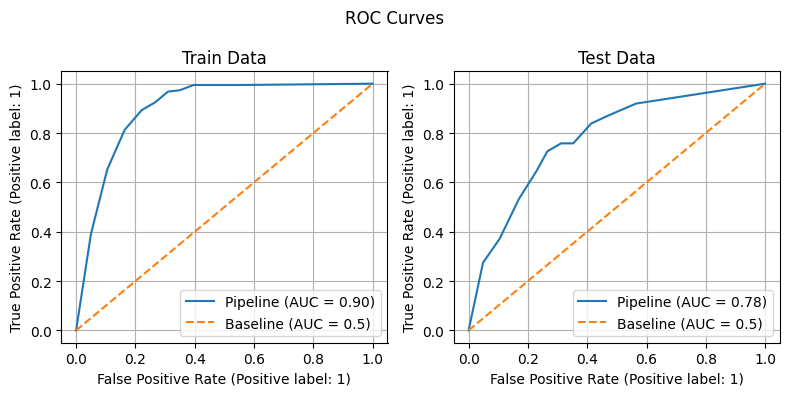

CPU times: user 1.8 s, sys: 196 ms, total: 2 s
Wall time: 3.52 s


In [ ]:
%%time
from sklearn.ensemble import BaggingClassifier
# Instantiate and fit BaggingClassifier undersampling pipe
under_sample_bagg_pipe = make_sampler_pipeline(preprocessor, under_sampler, BaggingClassifier())
under_sample_bagg_pipe.fit(X_train_under, y_train_under)
# Evaluate Model
train_preds = under_sample_bagg_pipe.predict(X_train_transformed)
test_preds = under_sample_bagg_pipe.predict(X_test_transformed)
evaluate_classification(under_sample_bagg_pipe, X_train_transformed, y_train, X_test_transformed, y_test)

## **RandomForestClassifier with Random Undersampling**

Classification Report for Train Data
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      3645
           1       0.13      0.96      0.23       187

    accuracy                           0.69      3832
   macro avg       0.56      0.82      0.52      3832
weighted avg       0.95      0.69      0.78      3832

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.99      0.68      0.80      1216
           1       0.12      0.84      0.21        62

    accuracy                           0.69      1278
   macro avg       0.55      0.76      0.50      1278
weighted avg       0.95      0.69      0.77      1278



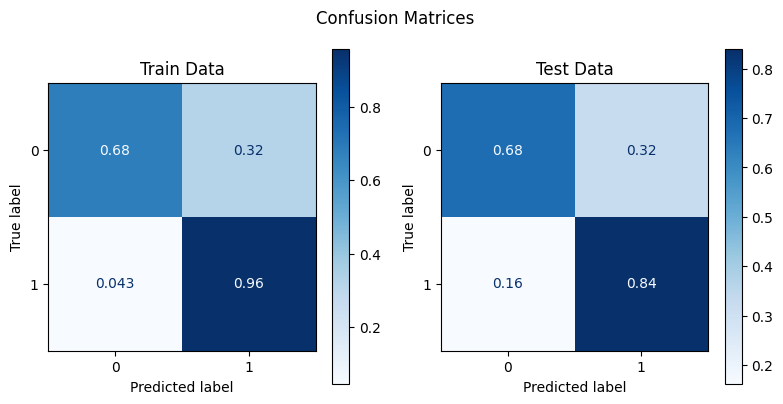

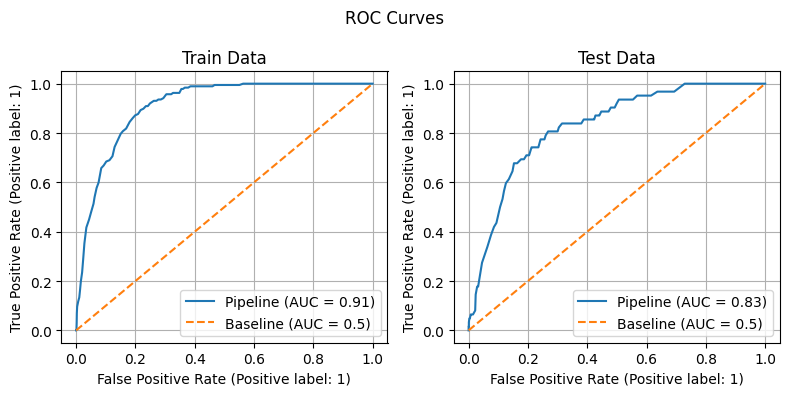

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate and fit RandomForestClassifier undersampling pipe
under_sample_rand_pipe =make_sampler_pipeline(preprocessor, under_sampler, RandomForestClassifier())
#Fit and evaluate the model
under_sample_rand_pipe .fit(X_train_under, y_train_under)
train_preds = under_sample_rand_pipe.predict(X_train_transformed)
test_preds = under_sample_rand_pipe.predict(X_test_transformed)
evaluate_classification(under_sample_rand_pipe, X_train_transformed, y_train, X_test_transformed, y_test)

* For Ensemble Parallel Models with Random Undersamplingsuch as BaggingClassifier & RandomForestClassifier,
RandomForestClassifier has better AUC=0.81 & BaggingClassifier has better accuracy = 0.71 on test set.

> * AdaBoostClassifier with RandomizedSearchCV gives the best metrics AUC =0.84 & accuracy =0.95 on test set.
* LGBMClassifier & XGBClassifier are the best predictive models for stroke target we choose LGBMClassifier because it detects highly FN=0.94 (the most problemetic) with AUC=0.82 on test set and perfect AUC=1 on train set.



# PCA to engineer the dataset

## **Feature Engineering**
> We will try to engineer some new features to improve a model's ability to predict stroke.

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 439.3+ KB


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Concatenating Features

In [ ]:
df['age'] = df['age'].round(-1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,70.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,60.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,50.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,80.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df['GenderAge'] = df['gender'] + df['age'].astype('string')
df.drop(columns=['gender','age'], inplace=True)
df.head()

,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,GenderAge
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Male70.0
1,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,Female60.0
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Male80.0
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Female50.0
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Female80.0


In [ ]:
df['ResidenceWork'] = df['Residence_type'] + df['work_type']
df.drop(columns=['Residence_type','work_type'], inplace=True)
df.head()

,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,GenderAge,ResidenceWork
0,0,1,Yes,228.69,36.6,formerly smoked,1,Male70.0,UrbanPrivate
1,0,0,Yes,202.21,28.9,never smoked,1,Female60.0,RuralSelf-employed
2,0,1,Yes,105.92,32.5,never smoked,1,Male80.0,RuralPrivate
3,0,0,Yes,171.23,34.4,smokes,1,Female50.0,UrbanPrivate
4,1,0,Yes,174.12,24.0,never smoked,1,Female80.0,RuralSelf-employed


In [ ]:
df['Diseases'] = df['hypertension'] + df['heart_disease']
df.drop(columns=['hypertension','heart_disease'], inplace=True)
df.head()

,ever_married,avg_glucose_level,bmi,smoking_status,stroke,GenderAge,ResidenceWork,Diseases
0,Yes,228.69,36.6,formerly smoked,1,Male70.0,UrbanPrivate,1
1,Yes,202.21,28.9,never smoked,1,Female60.0,RuralSelf-employed,0
2,Yes,105.92,32.5,never smoked,1,Male80.0,RuralPrivate,1
3,Yes,171.23,34.4,smokes,1,Female50.0,UrbanPrivate,0
4,Yes,174.12,24.0,never smoked,1,Female80.0,RuralSelf-employed,1


The expected values for normal fasting blood glucose concentration are between 70 mg/dL and 100 mg/dL.
Let's say instead of a float for the avg_glucose_level value; we want to bin these values into 'High', 'Normal' and 'Low'. We might write a function to find the mean value.

In [ ]:
df['glucose_level'] = df['avg_glucose_level'].replace('avg_', '')
df.drop(columns=['avg_glucose_level'], inplace=True)
df.head()

,ever_married,bmi,smoking_status,stroke,GenderAge,ResidenceWork,Diseases,glucose_level
0,Yes,36.6,formerly smoked,1,Male70.0,UrbanPrivate,1,228.69
1,Yes,28.9,never smoked,1,Female60.0,RuralSelf-employed,0,202.21
2,Yes,32.5,never smoked,1,Male80.0,RuralPrivate,1,105.92
3,Yes,34.4,smokes,1,Female50.0,UrbanPrivate,0,171.23
4,Yes,24.0,never smoked,1,Female80.0,RuralSelf-employed,1,174.12


## Transforming Features with .apply()

In [ ]:
# Find the mean glucose level in blood
mean_glucose = df['glucose_level'].mean()
# Define a function that returns 'High', 'Normal' & 'Low'
def bin_glucose(glucose_level):
    if glucose_level > mean_glucose:
        return 'Normal'
    else:
        return 'Abnormal'

In [ ]:
mean_glucose.round(2)

106.15

In [ ]:
# Apply bin_glucose function to each item in the 'glucose_level' column
df['glucose_level'] = df['glucose_level'].apply(bin_glucose)
df.head()

,ever_married,bmi,smoking_status,stroke,GenderAge,ResidenceWork,Diseases,glucose_level
0,Yes,36.6,formerly smoked,1,Male70.0,UrbanPrivate,1,Normal
1,Yes,28.9,never smoked,1,Female60.0,RuralSelf-employed,0,Normal
2,Yes,32.5,never smoked,1,Male80.0,RuralPrivate,1,Abnormal
3,Yes,34.4,smokes,1,Female50.0,UrbanPrivate,0,Normal
4,Yes,24.0,never smoked,1,Female80.0,RuralSelf-employed,1,Normal


In [ ]:
# Check types of all columns with the engineered features
df.dtypes

ever_married       object
bmi               float64
smoking_status     object
stroke              int64
GenderAge          string
ResidenceWork      object
Diseases           object
glucose_level      object
dtype: object

In [ ]:
# Convert the datatype from string to object
df['GenderAge'] = df['GenderAge'].astype(object)

In [ ]:
df.dtypes

ever_married       object
bmi               float64
smoking_status     object
stroke              int64
GenderAge          object
ResidenceWork      object
Diseases           object
glucose_level      object
dtype: object

We will apply PCA processing to a predictive model while retaining 95% of the variance.

In [ ]:
## Define X and y
target = 'stroke'
X = df.drop(columns=target).copy()
y = df[target].copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ever_married    5110 non-null   object 
 1   bmi             5110 non-null   float64
 2   smoking_status  5110 non-null   object 
 3   stroke          5110 non-null   int64  
 4   GenderAge       5110 non-null   object 
 5   ResidenceWork   5110 non-null   object 
 6   Diseases        5110 non-null   object 
 7   glucose_level   5110 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 319.5+ KB


,ever_married,bmi,smoking_status,stroke,GenderAge,ResidenceWork,Diseases,glucose_level
0,Yes,36.6,formerly smoked,1,Male70.0,UrbanPrivate,1,Normal
1,Yes,28.9,never smoked,1,Female60.0,RuralSelf-employed,0,Normal
2,Yes,32.5,never smoked,1,Male80.0,RuralPrivate,1,Abnormal
3,Yes,34.4,smokes,1,Female50.0,UrbanPrivate,0,Normal
4,Yes,24.0,never smoked,1,Female80.0,RuralSelf-employed,1,Normal


In [ ]:
# Perfoming a train-test-split : ALWAYS SPLIT BEFORE IMPUTING to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print('Train Size', X_train.shape[0])
print('Test Size', X_test.shape[0])

Train Size 3832
Test Size 1278


In [ ]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Create the preprocessing pipeline for numeric data
num_selector = make_column_selector(dtype_include='number')
# The imputation strategy: 'mean', replace missing values using the mean along each column
mean_imputer = SimpleImputer(strategy='mean') #
scaler = StandardScaler()
num_pipe = make_pipeline(mean_imputer, scaler)
# Make the tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_selector)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7a92ad0a8b20>)

In [ ]:
# PREPROCESSING PIPELINE FOR NOMINAL DATA
# Save list of column names
cat_selector = make_column_selector(dtype_include='object')
# Create imputer for nominal data
# The imputation strategy: 'constant', replace missing values with fill_value
const_imputer = SimpleImputer(strategy='constant')
## Making the OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
## Making an cat_pipe
cat_pipe = make_pipeline(const_imputer, ohe_encoder)
cat_pipe
## Make a nominal tuple for ColumnTransformer
cat_tuple = ('categorical', cat_pipe, cat_selector)
cat_tuple

('categorical',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7a92ad0a80d0>)

In [ ]:
# Instantiate the make column transformer
preprocessor = ColumnTransformer([num_tuple, cat_tuple],
                                 verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a92ad0a8b20>),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a92ad0a80d0>)],
                  verbose_feature_names_out=False)

In [ ]:
# Fit the column transformer on the X_train
X_train_processed = preprocessor.fit(X_train)

# Transform the X_train and the X_test
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# View the processed training & testing data
display(X_train_transformed, X_test_transformed)

,bmi,ever_married_No,ever_married_Yes,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_occasional smoker,smoking_status_smokes,GenderAge_Female0.0,GenderAge_Female10.0,GenderAge_Female20.0,...,ResidenceWork_UrbanChildren,ResidenceWork_UrbanGovt_job,ResidenceWork_UrbanNever_worked,ResidenceWork_UrbanPrivate,ResidenceWork_UrbanSelf-employed,Diseases_0,Diseases_1,Diseases_2,glucose_level_Abnormal,glucose_level_Normal
4505,1.926261,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3576,-0.050865,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3032,0.209283,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1867,-0.141917,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
494,1.405965,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.222290,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
466,4.072485,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3092,-1.442659,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3772,0.274320,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,bmi,ever_married_No,ever_married_Yes,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_occasional smoker,smoking_status_smokes,GenderAge_Female0.0,GenderAge_Female10.0,GenderAge_Female20.0,...,ResidenceWork_UrbanChildren,ResidenceWork_UrbanGovt_job,ResidenceWork_UrbanNever_worked,ResidenceWork_UrbanPrivate,ResidenceWork_UrbanSelf-employed,Diseases_0,Diseases_1,Diseases_2,glucose_level_Abnormal,glucose_level_Normal
4688,-0.766273,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4478,-0.076880,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3849,-0.831310,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4355,-1.221533,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3826,-0.219962,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,1.262883,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2437,-1.260555,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3164,0.001164,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
92,1.119802,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


## AdaBoostClassifier Model with the PCA transformation


In [ ]:
# Instantiating the PCA while retaining 95% of the variance when transforming without leaking information
pca = PCA(n_components=.95)
pca

PCA(n_components=0.95)

In [ ]:
# Use PCA to transform data
# Fit pca
X_train_pca = pca.fit_transform(X_train_transformed)
# Transform data
X_test_pca = pca.transform(X_test_transformed)
display(X_train_pca, X_test_pca)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23
4505,2.223320,-0.589597,0.647523,0.439791,0.768404,0.772592,-0.257857,0.407652,-0.399790,-0.123721,...,-0.188683,-0.228943,-0.090291,0.060768,0.032486,-0.046440,0.013796,-0.090144,-0.106618,-0.079848
3576,0.164732,0.020000,-0.653503,-0.416802,-0.790327,-0.203170,0.552546,-0.517353,-0.403537,-0.137545,...,0.015790,0.029855,0.598962,0.171473,-0.094274,-0.629872,-0.194217,-0.202942,0.036024,-0.173835
3032,0.403438,0.061608,-0.663621,-0.535289,0.643442,-0.186113,0.538299,-0.531802,-0.406019,-0.086162,...,-0.062943,0.152298,0.477038,0.024438,-0.235410,0.701165,0.038534,-0.192983,0.087401,-0.195998
1867,-0.129051,0.188354,-0.409197,-0.589097,-0.788072,-0.310887,-0.507952,0.196826,-0.449158,-0.343948,...,-0.053427,-0.066227,-0.140119,-0.007144,0.067977,0.012046,0.058870,0.039702,0.064789,-0.052348
494,1.598279,-0.461577,0.670374,-0.367658,-0.706624,-0.398468,0.472084,-0.612727,-0.304044,-0.279607,...,-0.131181,-0.160849,-0.085475,0.015328,-0.031598,-0.028859,0.113665,-0.044818,-0.125972,-0.036847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.387868,0.098707,-0.675981,0.468810,-0.030445,-0.028384,-0.447531,-0.258409,0.399524,-0.086914,...,0.207409,-0.191300,0.811890,0.450469,0.591073,-0.536060,0.132190,-0.084930,0.169364,-0.087579
466,4.085348,0.293878,1.390469,-0.472776,-0.631458,0.574310,0.277954,0.987946,0.142344,-0.167431,...,-0.175135,-0.258982,-0.072044,0.055728,-0.015593,-0.036930,0.064049,-0.045371,-0.235296,0.023892
3092,-1.987474,0.518205,0.210231,-0.341443,-0.014584,0.191882,-0.286575,-0.040346,0.090751,0.003216,...,-0.014340,0.044354,-0.153307,0.673782,-0.229576,0.071280,-0.000147,-0.027803,-0.139478,0.017482
3772,0.539747,-0.955002,0.386171,-0.480942,-0.025261,-0.023250,0.325805,-0.910765,0.266737,-0.063159,...,0.138437,0.095042,-0.026272,-0.055703,-0.060711,0.093971,-0.273525,-0.238048,0.300454,0.520319


,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23
4688,-1.235071,0.675127,0.258922,-0.318341,0.013711,0.245414,-0.248473,-0.085630,0.204042,-0.118150,...,0.200006,0.083930,-0.085595,-0.074432,-0.116070,0.096365,-0.087915,0.107075,0.418600,0.234188
4478,0.133560,-0.044324,-0.759792,0.464028,-0.039014,0.081957,-0.457970,-0.261200,0.410432,-0.199695,...,0.266650,0.056784,0.544649,0.125580,-0.170899,-0.499720,-0.402903,-0.304161,0.240338,-0.214106
3849,-1.451719,0.761329,0.381773,-0.350025,-0.001603,0.213614,-0.320085,-0.080256,0.127847,0.005132,...,-0.036763,-0.027475,-0.116468,0.682888,-0.308474,0.084177,0.004593,-0.061878,-0.299306,0.116914
4355,-0.736524,-0.815390,-1.090607,0.434435,-0.042612,1.400551,-0.309249,0.262965,0.118673,0.025802,...,0.126437,0.320966,-0.002397,-0.164767,-0.206513,-0.072263,0.511895,-0.087946,-0.021909,-0.168132
3826,-0.007799,-0.109771,-0.817614,0.501994,-0.015721,0.102794,-0.439348,-0.254746,0.403221,-0.016861,...,0.172250,0.085301,0.313858,0.134766,0.434564,-0.081177,1.105225,0.180879,-0.142736,0.076241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,1.494801,-0.521814,0.480617,0.569361,0.771022,-0.466763,-0.342775,-0.057088,-0.121934,-0.268700,...,-0.133809,-0.279813,-0.094882,0.030673,-0.085370,-0.019862,0.038031,-0.068752,-0.093163,-0.034166
2437,-1.835041,0.596373,0.279016,-0.334777,-0.007446,0.204915,-0.293061,-0.071771,0.118148,0.008540,...,-0.043766,-0.028057,-0.120514,0.677979,-0.305090,0.083575,0.001873,-0.074088,-0.321320,0.116148
3164,-0.294049,0.765086,0.105149,-0.047780,0.768005,-0.122868,0.844707,0.591142,0.318857,-0.036574,...,0.017175,-0.087847,0.127805,0.029112,-0.089795,0.027906,-0.267904,0.853921,-0.277256,-0.185708
92,0.714904,1.074515,0.318291,0.760250,0.100083,0.388893,-0.093836,-0.375387,0.645858,-0.172530,...,-0.126871,-0.269758,-0.167213,0.017580,-0.096787,-0.055868,-0.038558,-0.101690,0.166665,-0.209316


In [ ]:
# Check pca components
pca.n_components_

24

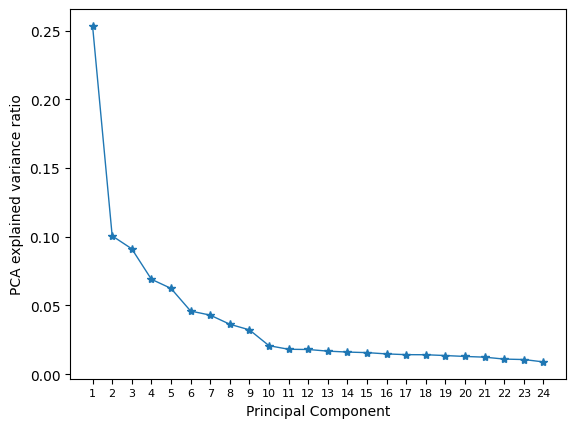

In [ ]:
## Plot a Scree plot
plt.plot(np.arange(1, pca.n_components_+1), pca.explained_variance_ratio_, marker ="*", linewidth=1)
plt.xticks(ticks = np.arange(1, pca.n_components_+1), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('PCA explained variance ratio');

The "elbow" or inflection point on the graph above can be seen around 10 principal components. This is where we don't get much benefit from further increasing the number of components, so it represents a good balance.

In [ ]:
# PCA with 7 components
pca10 = PCA(n_components=10)
pca10

PCA(n_components=10)

CPU times: user 16.2 s, sys: 12.6 s, total: 28.8 s
Wall time: 18.8 s


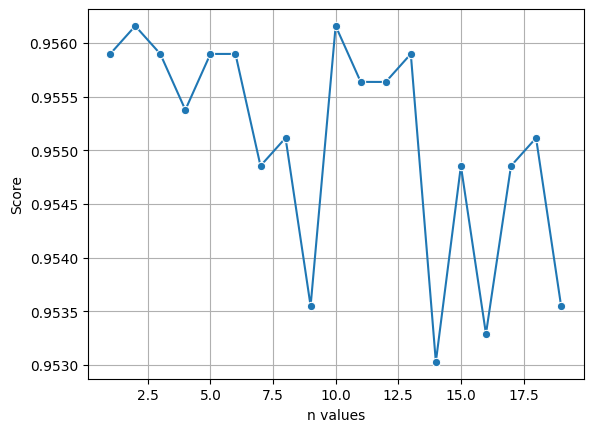

In [ ]:
%%time
# Check for n values (n_estimators) with for loop
n_values = [i for i in range (1,20)]
scores = []

for n in n_values:
    ada_pipe = make_pipeline(preprocessor, pca10, AdaBoostClassifier(n_estimators=n))
    score=cross_val_score(ada_pipe, X_train_pca, y_train)
    scores.append(np.mean(score))

sns.lineplot(x = n_values, y = scores, marker = 'o')
plt.xlabel("n values")
plt.ylabel("Score")
plt.grid()

It looks like the average cross-validation score for n_estimators = 10 gives the best score.

In [ ]:
# Choose the best value for n_estimators
best_index = np.argmax(scores)
best_n = n_values[best_index]
# Fitting the AdaBoostClassifier model with best n value
ada = AdaBoostClassifier(n_estimators=best_n)
ada.fit(X_train_pca, y_train)

AdaBoostClassifier(n_estimators=10)

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3663
           1       0.00      0.00      0.00       169

    accuracy                           0.95      3832
   macro avg       0.48      0.50      0.49      3832
weighted avg       0.91      0.95      0.93      3832

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.33      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.64      0.51      0.50      1278
weighted avg       0.90      0.94      0.91      1278



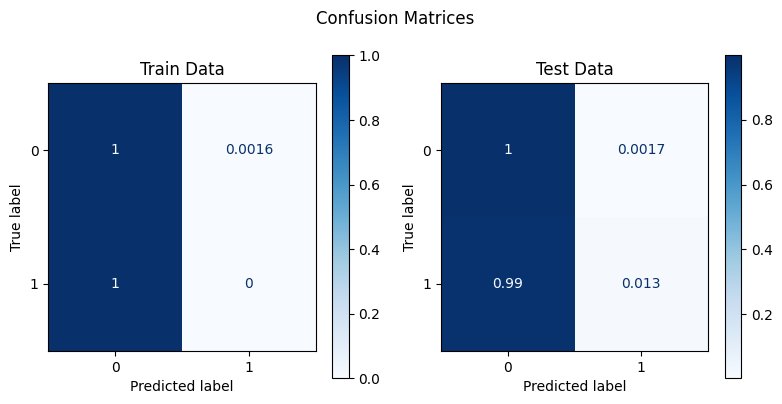

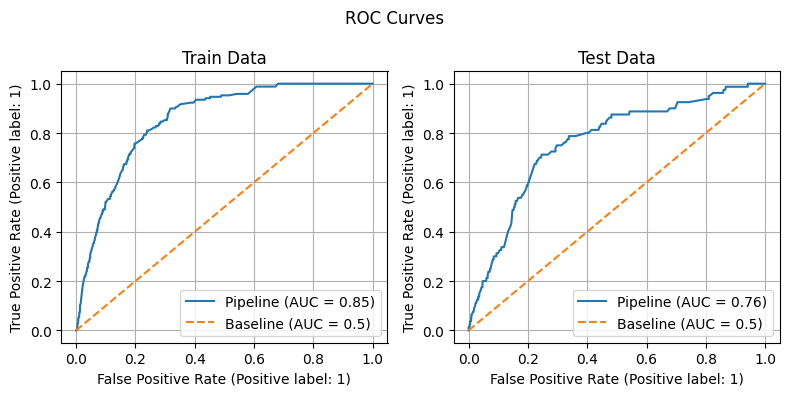

In [ ]:
# Fit the model pipeline on the training data transformed
ada_pipe.fit(X_train_pca, y_train)
# Make predictions for training & testing data
train_preds = ada_pipe.predict(X_train_pca)
test_preds = ada_pipe.predict(X_test_pca)
evaluate_classification(ada_pipe,X_train_pca, y_train, X_test_pca, y_test)

for best_n=10 with pca10, the AdaBoostClassifier don't show improvement in the prediction scores regarding AUC and accuracy. Feature engineering techniques with our model classifier transformed through PCA have not a good impact on our modeling results.

> ***My "production" model is LGBMClassifier that will be tunned with RandomizedSearchCV & Regularized by Ridge/Lasso/ElasticNet in order to improve the model classification performance.***